
<b> Author </b>: Nkama Chukwuemeka Livinus <br>
<b> Project Description </b>: This file contains models used in the classification of events in power systems


# Importation of Libraries

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import warnings
warnings.filterwarnings("ignore")
pd.options.mode.use_inf_as_na = True
from pandas.plotting import scatter_matrix

# <b>Data Importation and Preparation </b>

# Importation of Data

Since our dataset is made up of 15 different files, I have created a function below to read and merge all of them.

In [4]:
def read_data(filename):
    """
     Function reads a csv data file
    """
    return pd.read_csv(filename)


def merge_data():
    """
        Function reads a list of files
        and merges them into one gigantic dataset
    """
    data_frames = []
    for i in range(1,16):
        file = f'data{i}.csv'
        reader = read_data(file)
        data_frames.append(reader)
    return pd.concat(data_frames)

data = merge_data()
print(f'This dataset contains {data.shape[0]} data instances and {data.shape[1]} features including the target variable.')


This dataset contains 78377 data instances and 129 features including the target variable.


# Computing the Class Distribution in the Target Variable

Since the total number of data instances exceed 78000, I would have to perform random sampling since I don't have the computational resources to deal with such amount of data.

In [5]:
classes_count = data['marker'].value_counts() # number of classes in the target variable
def class_dist(classes_count):
    """
        Returns the class distribution 
        in the dataset.
    """
    perc_dist = classes_count*100/classes_count.sum()
    print(f'The class distribution in % for the given dataset is: \n{perc_dist}')

class_dist(classes_count)

The class distribution in % for the given dataset is: 
Attack      71.019559
Natural     23.360169
NoEvents     5.620271
Name: marker, dtype: float64


# Random Sampling of the Data

From my observation in the previous cells, it is clear to see that our data is made of over 78000 data instances. This is too large and might take a lot of computing power. To avoid such issues, I will attempt to sample 10% of the data while ensuring that my sample preserves the statistical properties of the dataset. To do this, I will use python's pandas module and perform sampling with replacement with an equal probability distribution to preserve bias. My decision to perform sampling with replacement is to keep the probability at the same state throughout the sampling process. I will then check the class distribution to confirm the preservation of bias.

In [6]:
data_samp = data.sample(frac=0.1, replace=True, weights=None, random_state=42)
data_samp

R1-PA1:VH      R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
345   -58.275537  130857.39610 -178.252900  130857.3961   61.770580   
860   -23.726182  132336.71910 -143.715004  132311.6458   96.297017   
3719  -46.833570  134768.82630 -166.839580  134091.8480   73.183899   
2646  -92.991050   45909.15737  164.966008  117217.5373   23.926718   
1299  -35.150961  131810.18040 -155.134053  131158.2754   84.866509   
...          ...           ...         ...          ...         ...   
5081 -125.993419  131760.03390  114.018601  131709.8873   -5.970220   
2545    1.592823  131032.90900 -118.367351  131007.8358  121.621751   
563  -131.499544  131760.03390  108.518206  131108.1288  -11.470615   
3556  -61.146056  130832.32290  178.860235  130205.4911   58.871413   
1670  -44.627683  131559.44770 -164.616504  130932.6159   75.389787   

         R1-PM3:V   R1-PA4:IH    R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
345   130932.6159  -62.016952   492.74901  176.958015  499.89030  ...   
860   132411.9389  -16.736097   241.52209 -141.898728  255.43845  ...   
3719  134818.9728  -48.208669   281.62318 -168.140195  282.17251  ...   
2646  120677.6485 -147.857489  1714.82515 -107.761902   51.27080  ...   
1299  131860.3269  -37.270905   372.44574 -157.328481  372.62885  ...   
...           ...         ...         ...         ...        ...  ...   
5081  131810.1804 -124.635509   352.66986  112.580477  362.37469  ...   
2545  131108.1288   -2.956462   474.98734 -122.847881  476.08600  ...   
563   131810.1804 -133.751268   381.05191  106.146161  381.60124  ...   
3556  130907.5427  -65.798473   505.93293  174.013012  507.39781  ...   
1670  131609.5942  -45.578793   399.36291 -167.349513  407.05353  ...   

      control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
345                    0           0           0           0           0   
860                    0           0           0           0           0   
3719                   0           0           0           0           0   
2646                   0           0           1           0           0   
1299                   0           0           0           0           0   
...                  ...         ...         ...         ...         ...   
5081                   0           0           0           0           0   
2545                   0           0           0           0           0   
563                    0           0           0           0           0   
3556                   0           0           0           0           0   
1670                   0           0           0           0           0   

      snort_log1  snort_log2  snort_log3  snort_log4    marker  
345            0           0           0           0  NoEvents  
860            0           0           0           0    Attack  
3719           0           0           0           0    Attack  
2646           0           0           0           0    Attack  
1299           0           0           0           0    Attack  
...          ...         ...         ...         ...       ...  
5081           0           0           0           0   Natural  
2545           0           0           0           0    Attack  
563            0           0           0           0    Attack  
3556           0           0           0           0   Natural  
1670           0           0           0           0    Attack  

[7838 rows x 129 columns]

# Confirmation of Preservation of Statistical Properties in Sampled Data

This section attempts to see if my dataset was sampled correctly. From the results shown below, it is clear that the sampling process is spot on as the bias in the class distribution is still there. Attack comprises approximately 71% of the entire class set. Natural comprises 23% and NoEvents takes up about 5%. All of this matches what was obtained previously and hence, the data sampling process was a success.

In [7]:
classes_count_samp = data_samp['marker'].value_counts()
class_dist(classes_count_samp)

The class distribution in % for the given dataset is: 
Attack      70.872672
Natural     23.513651
NoEvents     5.613677
Name: marker, dtype: float64


# Cursory Overview of the Data

Before performing any step, it is always important to some have some form of insight into the structure of the dataset. To do that, I will print out the dataset in order to get an idea of what it is composed of.

In [8]:
data_samp

R1-PA1:VH      R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
345   -58.275537  130857.39610 -178.252900  130857.3961   61.770580   
860   -23.726182  132336.71910 -143.715004  132311.6458   96.297017   
3719  -46.833570  134768.82630 -166.839580  134091.8480   73.183899   
2646  -92.991050   45909.15737  164.966008  117217.5373   23.926718   
1299  -35.150961  131810.18040 -155.134053  131158.2754   84.866509   
...          ...           ...         ...          ...         ...   
5081 -125.993419  131760.03390  114.018601  131709.8873   -5.970220   
2545    1.592823  131032.90900 -118.367351  131007.8358  121.621751   
563  -131.499544  131760.03390  108.518206  131108.1288  -11.470615   
3556  -61.146056  130832.32290  178.860235  130205.4911   58.871413   
1670  -44.627683  131559.44770 -164.616504  130932.6159   75.389787   

         R1-PM3:V   R1-PA4:IH    R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
345   130932.6159  -62.016952   492.74901  176.958015  499.89030  ...   
860   132411.9389  -16.736097   241.52209 -141.898728  255.43845  ...   
3719  134818.9728  -48.208669   281.62318 -168.140195  282.17251  ...   
2646  120677.6485 -147.857489  1714.82515 -107.761902   51.27080  ...   
1299  131860.3269  -37.270905   372.44574 -157.328481  372.62885  ...   
...           ...         ...         ...         ...        ...  ...   
5081  131810.1804 -124.635509   352.66986  112.580477  362.37469  ...   
2545  131108.1288   -2.956462   474.98734 -122.847881  476.08600  ...   
563   131810.1804 -133.751268   381.05191  106.146161  381.60124  ...   
3556  130907.5427  -65.798473   505.93293  174.013012  507.39781  ...   
1670  131609.5942  -45.578793   399.36291 -167.349513  407.05353  ...   

      control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
345                    0           0           0           0           0   
860                    0           0           0           0           0   
3719                   0           0           0           0           0   
2646                   0           0           1           0           0   
1299                   0           0           0           0           0   
...                  ...         ...         ...         ...         ...   
5081                   0           0           0           0           0   
2545                   0           0           0           0           0   
563                    0           0           0           0           0   
3556                   0           0           0           0           0   
1670                   0           0           0           0           0   

      snort_log1  snort_log2  snort_log3  snort_log4    marker  
345            0           0           0           0  NoEvents  
860            0           0           0           0    Attack  
3719           0           0           0           0    Attack  
2646           0           0           0           0    Attack  
1299           0           0           0           0    Attack  
...          ...         ...         ...         ...       ...  
5081           0           0           0           0   Natural  
2545           0           0           0           0    Attack  
563            0           0           0           0    Attack  
3556           0           0           0           0   Natural  
1670           0           0           0           0    Attack  

[7838 rows x 129 columns]

From above, it is clear to see that the data is made up of a lot of features with the variable of interest placed in the last column. Also, it contains about 7838 samples and 129 features including the target variable.

# <b> Exploratory Data Analysis </b>

# Inquisition into the existence of Missing and Inf Values

It is critical to check for missing and inf values in any dataset. Hence, I will begin my preprocessing by
identifying potential spots where these values could occur.

In [9]:

def check_missing_values(dataset):
    """ 
        This function takes a dataset and
        checks if there are missing values 
        in any of its columns
    """
     # To ensure empty fields and np.inf are captured
    miss_vals = dataset.isnull()
    if np.any(miss_vals):
        print("There are missing or inf values in the dataset")
    else:
        print("There are no missing values")

check_missing_values(data_samp)

There are missing or inf values in the dataset


Since there are missing or inf values in the dataset, I will have to do some preprocessing before any further exploration. The reason for this is simple: not doing this will lead to errors when trying to analyse the data. Python's data processing libraries assume the data they receive is already in the right format. Hence, trying to parse the distribution of the data will lead to errors if there are missing, inf or nan values in the data. Hence, I will pause my exploration for now and try out some data preprocessing.

# <b> Data Preprocessing </b>

# Handling of Missing and Inf Values

Having identified Nan/inf values in the dataset, it is necessary to handle them before the carrying out of any further exploratory analysis of the dataset. In the cell below, I proceed to replace the Nan/inf values in every column with the mean value of the column.

In [10]:
# Replacing the nan and inf values with the mean of each column
rows, columns = np.where(data_samp.isna()) # Extraction of column indices where nan or inf values occur
for i in columns:
    mean = data_samp.iloc[:,i].mean()
    data_samp.iloc[:,i] = data_samp.iloc[:,i].fillna(mean)

Now that the Nan and inf values have been replaced in the previous cell, I will run another check in the cell below to confirm the success of the operation and make sure that the dataset is correctly ready for any exploratory data analysis.

In [11]:
check_missing_values(data_samp)

There are no missing values


From the cell above, it is clear that the dataset is now free from any form of missing values that could be present in it. It is now possible for me to continue with my data exploration process.

# <b>Exploratory Data Analysis (Continued)</b>

# Identification of Outliers

The chart below identifies the box plot for the first 10 features in the dataset. Since the number of features are 128, It would be ludicrous to show the boxplots for all of them.  However, of the 10 shown below, It is clear there are outliers in the data.

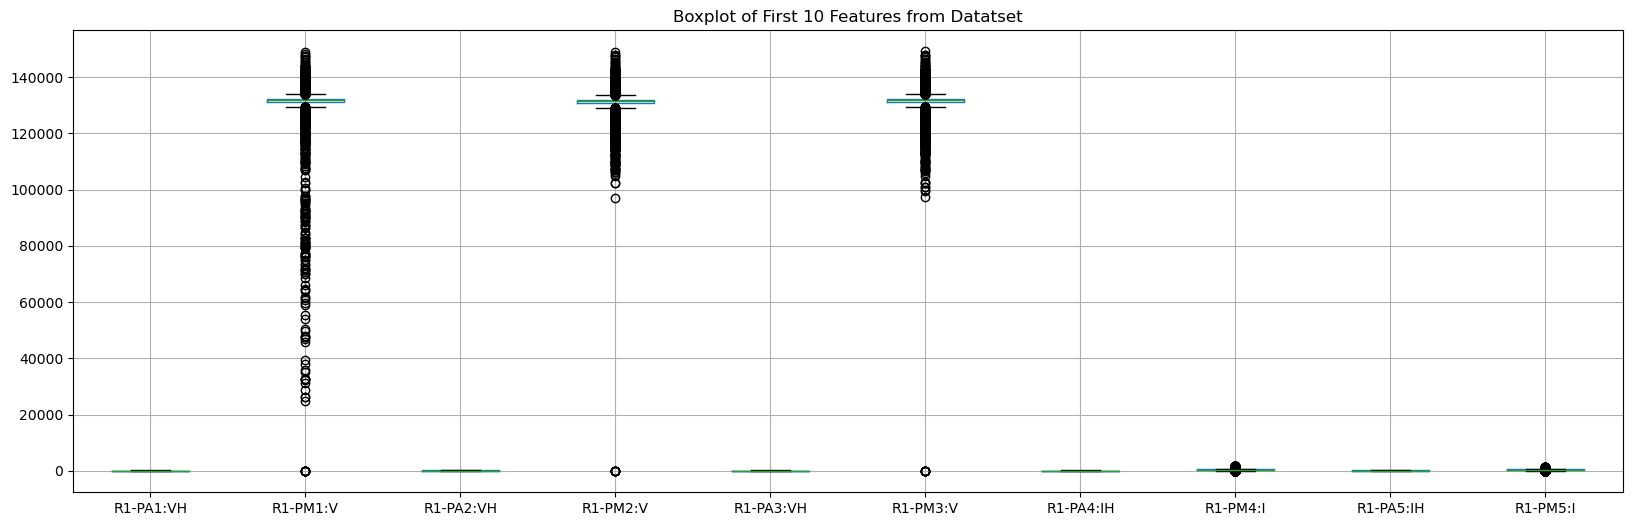

In [12]:
data_samp.iloc[:,:10].boxplot(figsize=(20,6))
plt.title('Boxplot of First 10 Features from Datatset')
plt.show()

# <b> Data Preprocessing (Continued) </b>

# Handling of Outliers

Looking at the boxplot in the previous section, It is hard to visualize what is going on. Hence, I will attempt to extract the first two boxplots one after the other and show what they contain for analytical purposes. I will then try to see if these outliers can be handled appropriately.

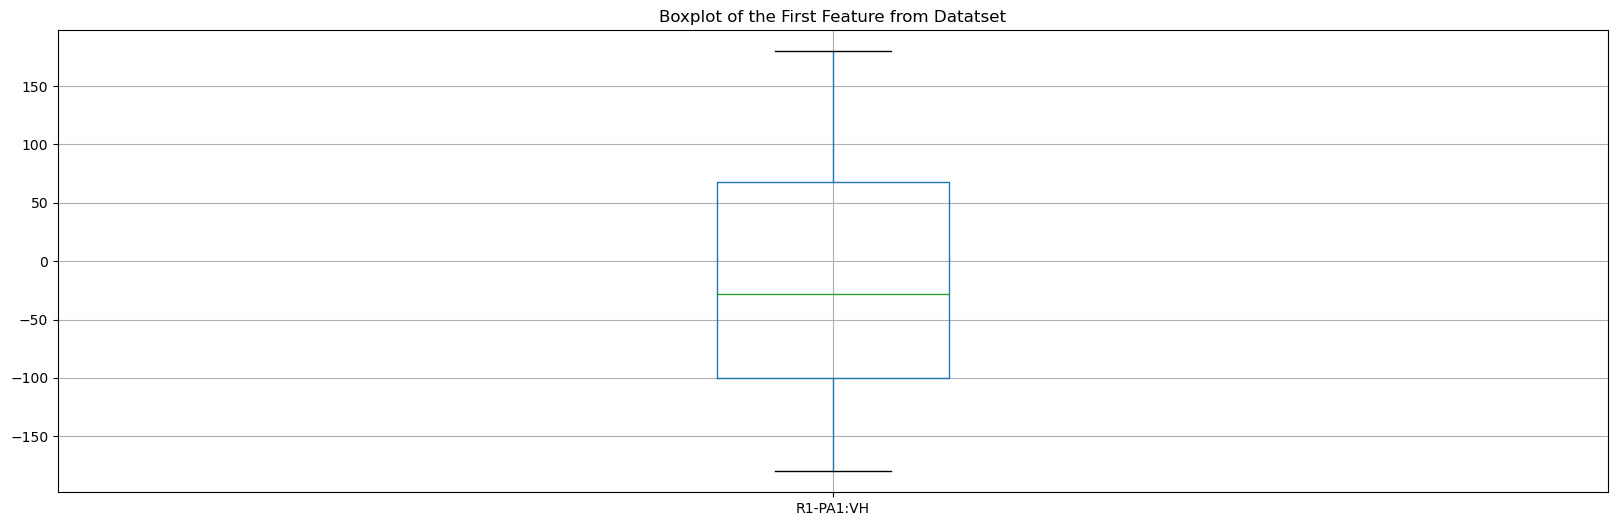

In [13]:
data_samp.iloc[:,:1].boxplot(figsize=(20,6))
plt.title('Boxplot of the First Feature from Datatset')
plt.show()

From the boxplot shown above, it is clear that features in the dataset having a distribution of this form do not have any outliers. However, like we saw earlier, there are some feature columns with outliers. An example of this is depicted below and corresponds to the second feature in the dataset.

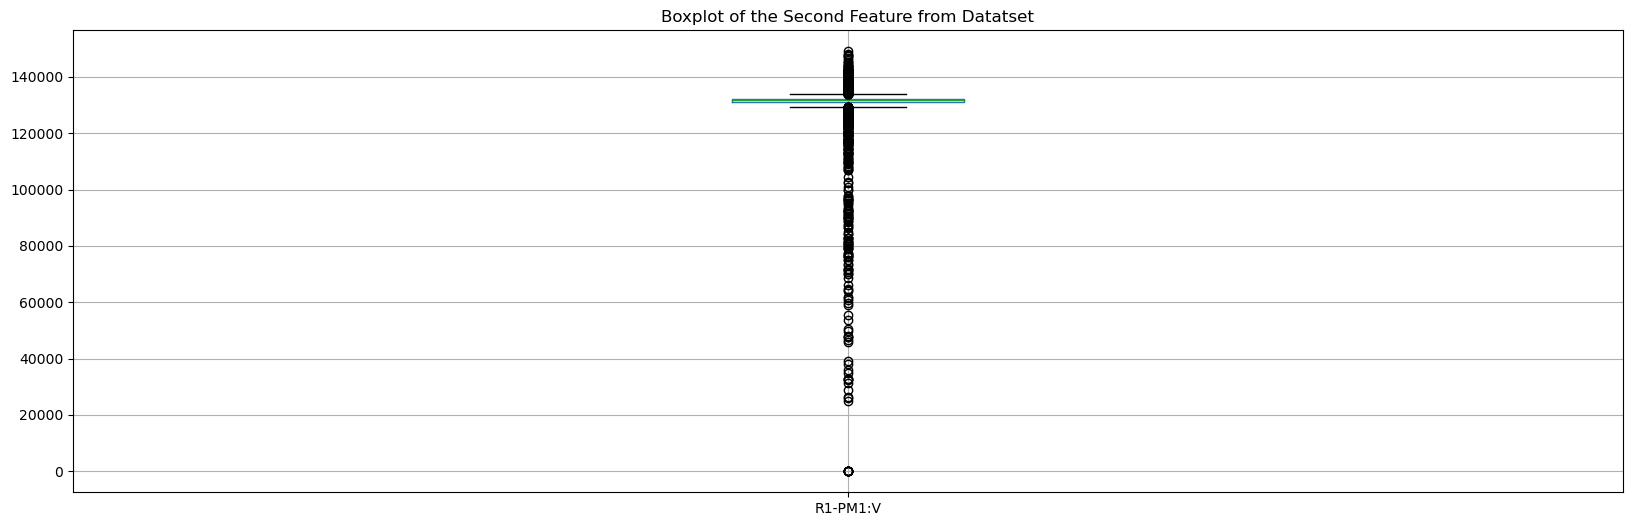

In [14]:
data_samp.iloc[:,1:2].boxplot(figsize=(20,6))
plt.title('Boxplot of the Second Feature from Datatset')
plt.show()

# Dealing with the Outliers

A close look at the chart above shows that there a lot of outliers in the R1-PM1:V feature. Although, it is tempting to get rid of features with this form of distribution, it is dangerous to do so in this case and there are several reasons for this.<br>

1. A lot of features in the dataset have a similar distribution as seen in the chart showing the boxplot for 10 features. <br>
2. The outliers are much. Any attempt to remove them will reduce the dataset to an unusable state. <br>
3. Removing the outliers in this case is most likely unwise because these outliers probably represent the detection of anomalies by the breaker devices.<br>

Due to the above reasons, the outliers will be left the way they are. It would be best to work with them that way so that our model is not affected. Finally, there are anecdotes in the machine learning community about the need to be cautious when dealing with outliers. Since the outliers are a figure of interest as they help in identifying if our power system is working well, they will be left untouched. A reference to my reason for this decision is emphatically explained [here](https://www.analyticsvidhya.com/blog/2021/05/why-you-shouldnt-just-delete-outliers/).

# <b> Exploratory Data Analysis (Continued) </b>

# Summary Statistics

It is vital to have insight into the summary statistics of the dataset in question. Below is a table showing relevant statistics about the nature of the data.

In [15]:
data_samp.describe()

R1-PA1:VH       R1-PM1:V    R1-PA2:VH       R1-PM2:V    R1-PA3:VH  \
count  7838.000000    7838.000000  7838.000000    7838.000000  7838.000000   
mean    -16.373148  130712.896942     3.238750  131032.125285     7.391198   
std     100.351252    8803.638216   111.790005    5379.159178    97.319347   
min    -179.983232       0.000000  -179.897289       0.000000  -179.983232   
25%     -99.951055  131057.982300   -99.777735  130706.956500   -68.551535   
50%     -28.424436  131684.814000     8.708958  131333.788300    14.730745   
75%      67.677775  132186.279400   106.123243  131885.400200    85.688703   
max     179.868641  149060.590200   179.977503  149035.516900   179.971773   

            R1-PM3:V    R1-PA4:IH     R1-PM4:I    R1-PA5:IH     R1-PM5:I  ...  \
count    7838.000000  7838.000000  7838.000000  7838.000000  7838.000000  ...   
mean   131405.591610   -14.801261   396.357481     4.209061   388.376731  ...   
std      5412.841311    99.027205   195.508223   109.768726   151.771594  ...   
min         0.000000  -179.994691     0.000000  -179.994691     0.000000  ...   
25%    131108.128800   -97.364151   308.357240   -94.790138   314.216760  ...   
50%    131734.960600   -23.107388   381.601240     1.853518   385.263440  ...   
75%    132236.426000    64.994900   458.324330   104.465962   461.986530  ...   
max    149160.883200   179.931666  1776.533220   179.988962  1255.768380  ...   

       control_panel_log3  control_panel_log4   relay1_log   relay2_log  \
count              7838.0              7838.0  7838.000000  7838.000000   
mean                  0.0                 0.0     0.035596     0.027686   
std                   0.0                 0.0     0.185292     0.164081   
min                   0.0                 0.0     0.000000     0.000000   
25%                   0.0                 0.0     0.000000     0.000000   
50%                   0.0                 0.0     0.000000     0.000000   
75%                   0.0                 0.0     0.000000     0.000000   
max                   0.0                 0.0     1.000000     1.000000   

        relay3_log   relay4_log  snort_log1  snort_log2   snort_log3  \
count  7838.000000  7838.000000      7838.0      7838.0  7838.000000   
mean      0.026027     0.034830         0.0         0.0     0.000128   
std       0.159226     0.183362         0.0         0.0     0.011295   
min       0.000000     0.000000         0.0         0.0     0.000000   
25%       0.000000     0.000000         0.0         0.0     0.000000   
50%       0.000000     0.000000         0.0         0.0     0.000000   
75%       0.000000     0.000000         0.0         0.0     0.000000   
max       1.000000     1.000000         0.0         0.0     1.000000   

        snort_log4  
count  7838.000000  
mean      0.000255  
std       0.015973  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 128 columns]

From the table above, it is clear to see some interesting things at play. The one I would love to highlight, however, is the standard deviation. It is clear from the table that the standard deviation of a number of the features are very large. For example, R1-PM2:V has a standard deviation of 5379.16. This indicates a very high spread in the data and possibly highlights the persistent occurence of attacks on the power system as evidenced in the class distribution of the markers column.<br>

Secondly, some of the features have <b>zero standard deviation</b>. This means their correlation with other features would lead to errors. This fact is highlighted and explained in the next section.

# Correlation

It is important to have an idea of the level of correlation amongst the features in the dataset. So, I would go ahead to derive a correlation matrix showing the correlation between features.

In [16]:
data_samp.iloc[:,:].corr()

R1-PA1:VH  R1-PM1:V  R1-PA2:VH  R1-PM2:V  R1-PA3:VH  R1-PM3:V  \
R1-PA1:VH    1.000000 -0.012581  -0.363549 -0.000783  -0.297235 -0.000857   
R1-PM1:V    -0.012581  1.000000   0.000103  0.769289   0.022702  0.770899   
R1-PA2:VH   -0.363549  0.000103   1.000000 -0.001045  -0.335949 -0.000369   
R1-PM2:V    -0.000783  0.769289  -0.001045  1.000000   0.006343  0.996451   
R1-PA3:VH   -0.297235  0.022702  -0.335949  0.006343   1.000000  0.005928   
...               ...       ...        ...       ...        ...       ...   
relay4_log  -0.008735 -0.148243   0.010643 -0.188330   0.002570 -0.190869   
snort_log1        NaN       NaN        NaN       NaN        NaN       NaN   
snort_log2        NaN       NaN        NaN       NaN        NaN       NaN   
snort_log3   0.005289  0.000636  -0.009360 -0.000946   0.016628 -0.000255   
snort_log4  -0.000149  0.000968   0.005640 -0.001226   0.015650 -0.000249   

            R1-PA4:IH  R1-PM4:I  R1-PA5:IH  R1-PM5:I  ...  control_panel_log3  \
R1-PA1:VH    0.896746 -0.003331  -0.362095 -0.016824  ...                 NaN   
R1-PM1:V    -0.022869 -0.628250  -0.011593 -0.205280  ...                 NaN   
R1-PA2:VH   -0.337065  0.006013   0.908671  0.009486  ...                 NaN   
R1-PM2:V    -0.005836 -0.356692  -0.010647 -0.275573  ...                 NaN   
R1-PA3:VH   -0.300686 -0.007891  -0.311726  0.014666  ...                 NaN   
...               ...       ...        ...       ...  ...                 ...   
relay4_log   0.002679  0.330592   0.017707  0.384500  ...                 NaN   
snort_log1        NaN       NaN        NaN       NaN  ...                 NaN   
snort_log2        NaN       NaN        NaN       NaN  ...                 NaN   
snort_log3   0.004862  0.003253  -0.010033  0.005179  ...                 NaN   
snort_log4  -0.000827  0.004174   0.005050  0.006814  ...                 NaN   

            control_panel_log4  relay1_log  relay2_log  relay3_log  \
R1-PA1:VH                  NaN    0.020682    0.015059   -0.026773   
R1-PM1:V                   NaN    0.073587   -0.038411   -0.145693   
R1-PA2:VH                  NaN   -0.017137   -0.005037    0.014447   
R1-PM2:V                   NaN    0.128135    0.096184   -0.251243   
R1-PA3:VH                  NaN    0.022753    0.006362    0.009328   
...                        ...         ...         ...         ...   
relay4_log                 NaN    0.147531   -0.032055    0.602665   
snort_log1                 NaN         NaN         NaN         NaN   
snort_log2                 NaN         NaN         NaN         NaN   
snort_log3                 NaN   -0.002170   -0.001906    0.069101   
snort_log4                 NaN   -0.003069   -0.002696    0.047559   

            relay4_log  snort_log1  snort_log2  snort_log3  snort_log4  
R1-PA1:VH    -0.008735         NaN         NaN    0.005289   -0.000149  
R1-PM1:V     -0.148243         NaN         NaN    0.000636    0.000968  
R1-PA2:VH     0.010643         NaN         NaN   -0.009360    0.005640  
R1-PM2:V     -0.188330         NaN         NaN   -0.000946   -0.001226  
R1-PA3:VH     0.002570         NaN         NaN    0.016628    0.015650  
...                ...         ...         ...         ...         ...  
relay4_log    1.000000         NaN         NaN    0.059463    0.040532  
snort_log1         NaN         NaN         NaN         NaN         NaN  
snort_log2         NaN         NaN         NaN         NaN         NaN  
snort_log3    0.059463         NaN         NaN    1.000000    0.707062  
snort_log4    0.040532         NaN         NaN    0.707062    1.000000  

[128 rows x 128 columns]

From the table above, there is a problem. Python is generating NaN values for the correlation due to the fact that some of the features have zero standard deviation. In the following section, I will extract those features and get rid of them before computing the correlation.

In [17]:
loc_zerostd =np.where(data_samp.std() == 0)[0] # location of features with zero standard deviation
column_zero = data_samp.std()[loc_zerostd].index.to_list() # column names of features with zero standard deviation

Now that I have gotten the features with zero standard deviation, I will attempt to compute the correlation in the cell below.

In [18]:
corr_data = data_samp.drop(column_zero, axis=1).corr()
corr_data

R1-PA1:VH  R1-PM1:V  R1-PA2:VH  R1-PM2:V  R1-PA3:VH  R1-PM3:V  \
R1-PA1:VH    1.000000 -0.012581  -0.363549 -0.000783  -0.297235 -0.000857   
R1-PM1:V    -0.012581  1.000000   0.000103  0.769289   0.022702  0.770899   
R1-PA2:VH   -0.363549  0.000103   1.000000 -0.001045  -0.335949 -0.000369   
R1-PM2:V    -0.000783  0.769289  -0.001045  1.000000   0.006343  0.996451   
R1-PA3:VH   -0.297235  0.022702  -0.335949  0.006343   1.000000  0.005928   
...               ...       ...        ...       ...        ...       ...   
relay2_log   0.015059 -0.038411  -0.005037  0.096184   0.006362  0.096684   
relay3_log  -0.026773 -0.145693   0.014447 -0.251243   0.009328 -0.242740   
relay4_log  -0.008735 -0.148243   0.010643 -0.188330   0.002570 -0.190869   
snort_log3   0.005289  0.000636  -0.009360 -0.000946   0.016628 -0.000255   
snort_log4  -0.000149  0.000968   0.005640 -0.001226   0.015650 -0.000249   

            R1-PA4:IH  R1-PM4:I  R1-PA5:IH  R1-PM5:I  ...     R4:DF   R4-PA:Z  \
R1-PA1:VH    0.896746 -0.003331  -0.362095 -0.016824  ... -0.016797 -0.009778   
R1-PM1:V    -0.022869 -0.628250  -0.011593 -0.205280  ... -0.076618  0.029909   
R1-PA2:VH   -0.337065  0.006013   0.908671  0.009486  ... -0.006154  0.019438   
R1-PM2:V    -0.005836 -0.356692  -0.010647 -0.275573  ... -0.065842 -0.024590   
R1-PA3:VH   -0.300686 -0.007891  -0.311726  0.014666  ... -0.002062 -0.013524   
...               ...       ...        ...       ...  ...       ...       ...   
relay2_log   0.017045 -0.190268   0.001031 -0.393429  ... -0.027493 -0.087049   
relay3_log  -0.024279  0.390779   0.026341  0.504925  ...  0.008169  0.166452   
relay4_log   0.002679  0.330592   0.017707  0.384500  ... -0.010093  0.019314   
snort_log3   0.004862  0.003253  -0.010033  0.005179  ... -0.000125 -0.002230   
snort_log4  -0.000827  0.004174   0.005050  0.006814  ... -0.000176 -0.003037   

            R4-PA:ZH      R4:S  relay1_log  relay2_log  relay3_log  \
R1-PA1:VH   0.021512  0.015601    0.020682    0.015059   -0.026773   
R1-PM1:V   -0.347750  0.006011    0.073587   -0.038411   -0.145693   
R1-PA2:VH  -0.022385  0.016554   -0.017137   -0.005037    0.014447   
R1-PM2:V   -0.051521  0.002535    0.128135    0.096184   -0.251243   
R1-PA3:VH  -0.007727  0.004602    0.022753    0.006362    0.009328   
...              ...       ...         ...         ...         ...   
relay2_log  0.189185  0.000210    0.597126    1.000000   -0.027584   
relay3_log -0.176698  0.016499   -0.031406   -0.027584    1.000000   
relay4_log  0.031392  0.020794    0.147531   -0.032055    0.602665   
snort_log3  0.000994 -0.000767   -0.002170   -0.001906    0.069101   
snort_log4  0.001201 -0.001084   -0.003069   -0.002696    0.047559   

            relay4_log  snort_log3  snort_log4  
R1-PA1:VH    -0.008735    0.005289   -0.000149  
R1-PM1:V     -0.148243    0.000636    0.000968  
R1-PA2:VH     0.010643   -0.009360    0.005640  
R1-PM2:V     -0.188330   -0.000946   -0.001226  
R1-PA3:VH     0.002570    0.016628    0.015650  
...                ...         ...         ...  
relay2_log   -0.032055   -0.001906   -0.002696  
relay3_log    0.602665    0.069101    0.047559  
relay4_log    1.000000    0.059463    0.040532  
snort_log3    0.059463    1.000000    0.707062  
snort_log4    0.040532    0.707062    1.000000  

[122 rows x 122 columns]

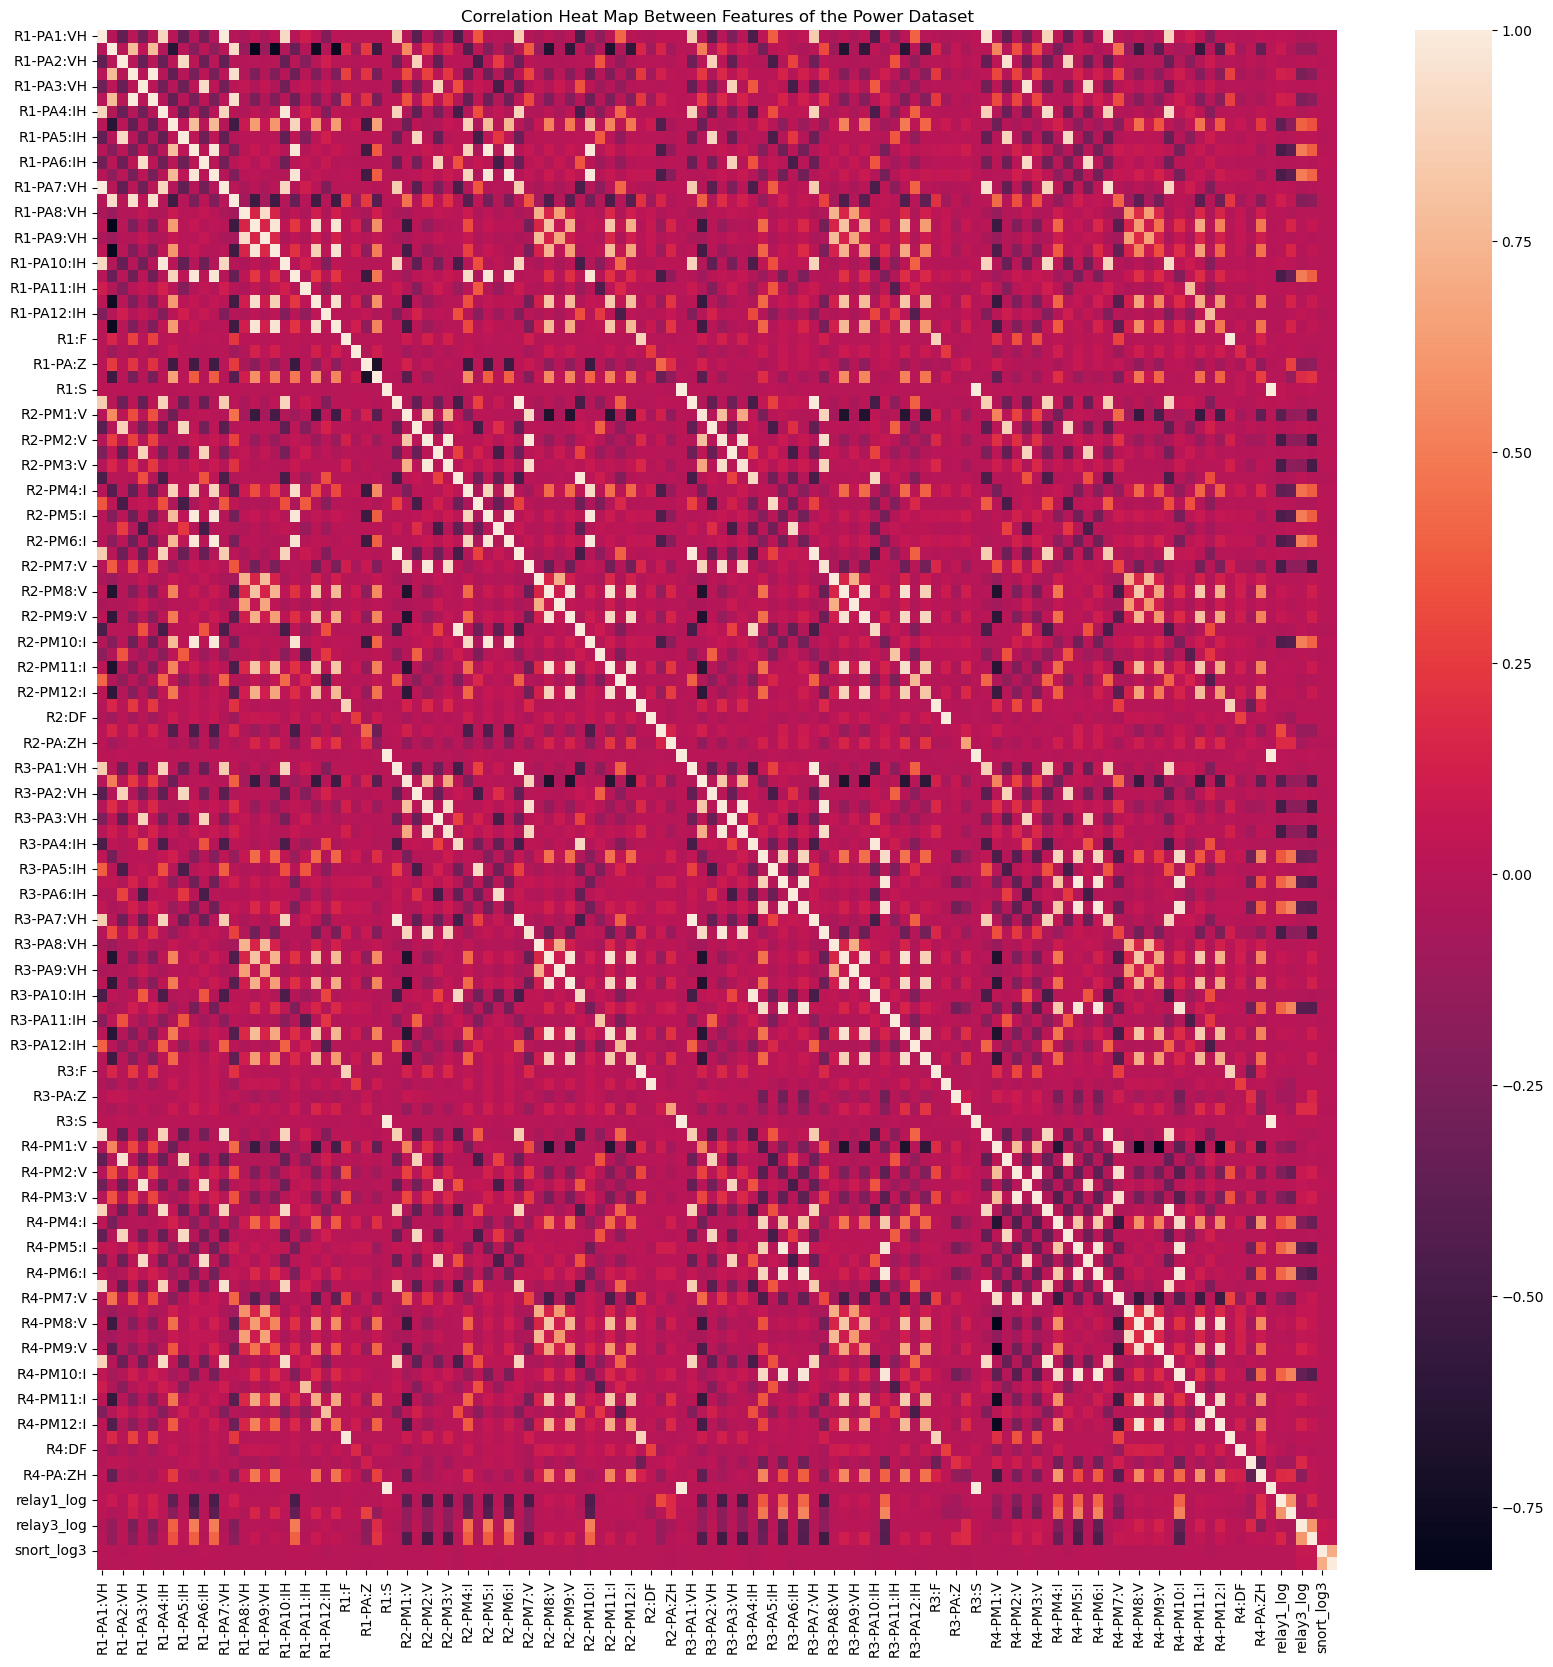

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_data)
plt.title('Correlation Heat Map Between Features of the Power Dataset')
plt.show()

The image above depicts the heat map of the correlation matrix of the dataset. The white line running across the diagonal above depicts perfect correlation which occurs between a feature and itself. However, there are other cells that look white also and do not appear along the diagonal. This points to the existence of collinearity, and it is highly likely that quite a number of these features are redundant. Later on, when building a model, I will undergo feature selection methods to get rid of features that depict high collinearity.

# Scatterplot matrix and the Presence of Collinearity?

The section below depicts a scatterplot matrix for 10 features in the dataset. I decided to depict this to confirm the existence of collinearity amongst features in the dataset. The image below shows an almost perfect correlation for quite a number of the 10 features illustrated. This is even more as the correlation heat map in the previous section shows. This emphasizes the importance of the feature selection process in preventing the model from overfitting and enhancing its ability to generalize well to unseen data.

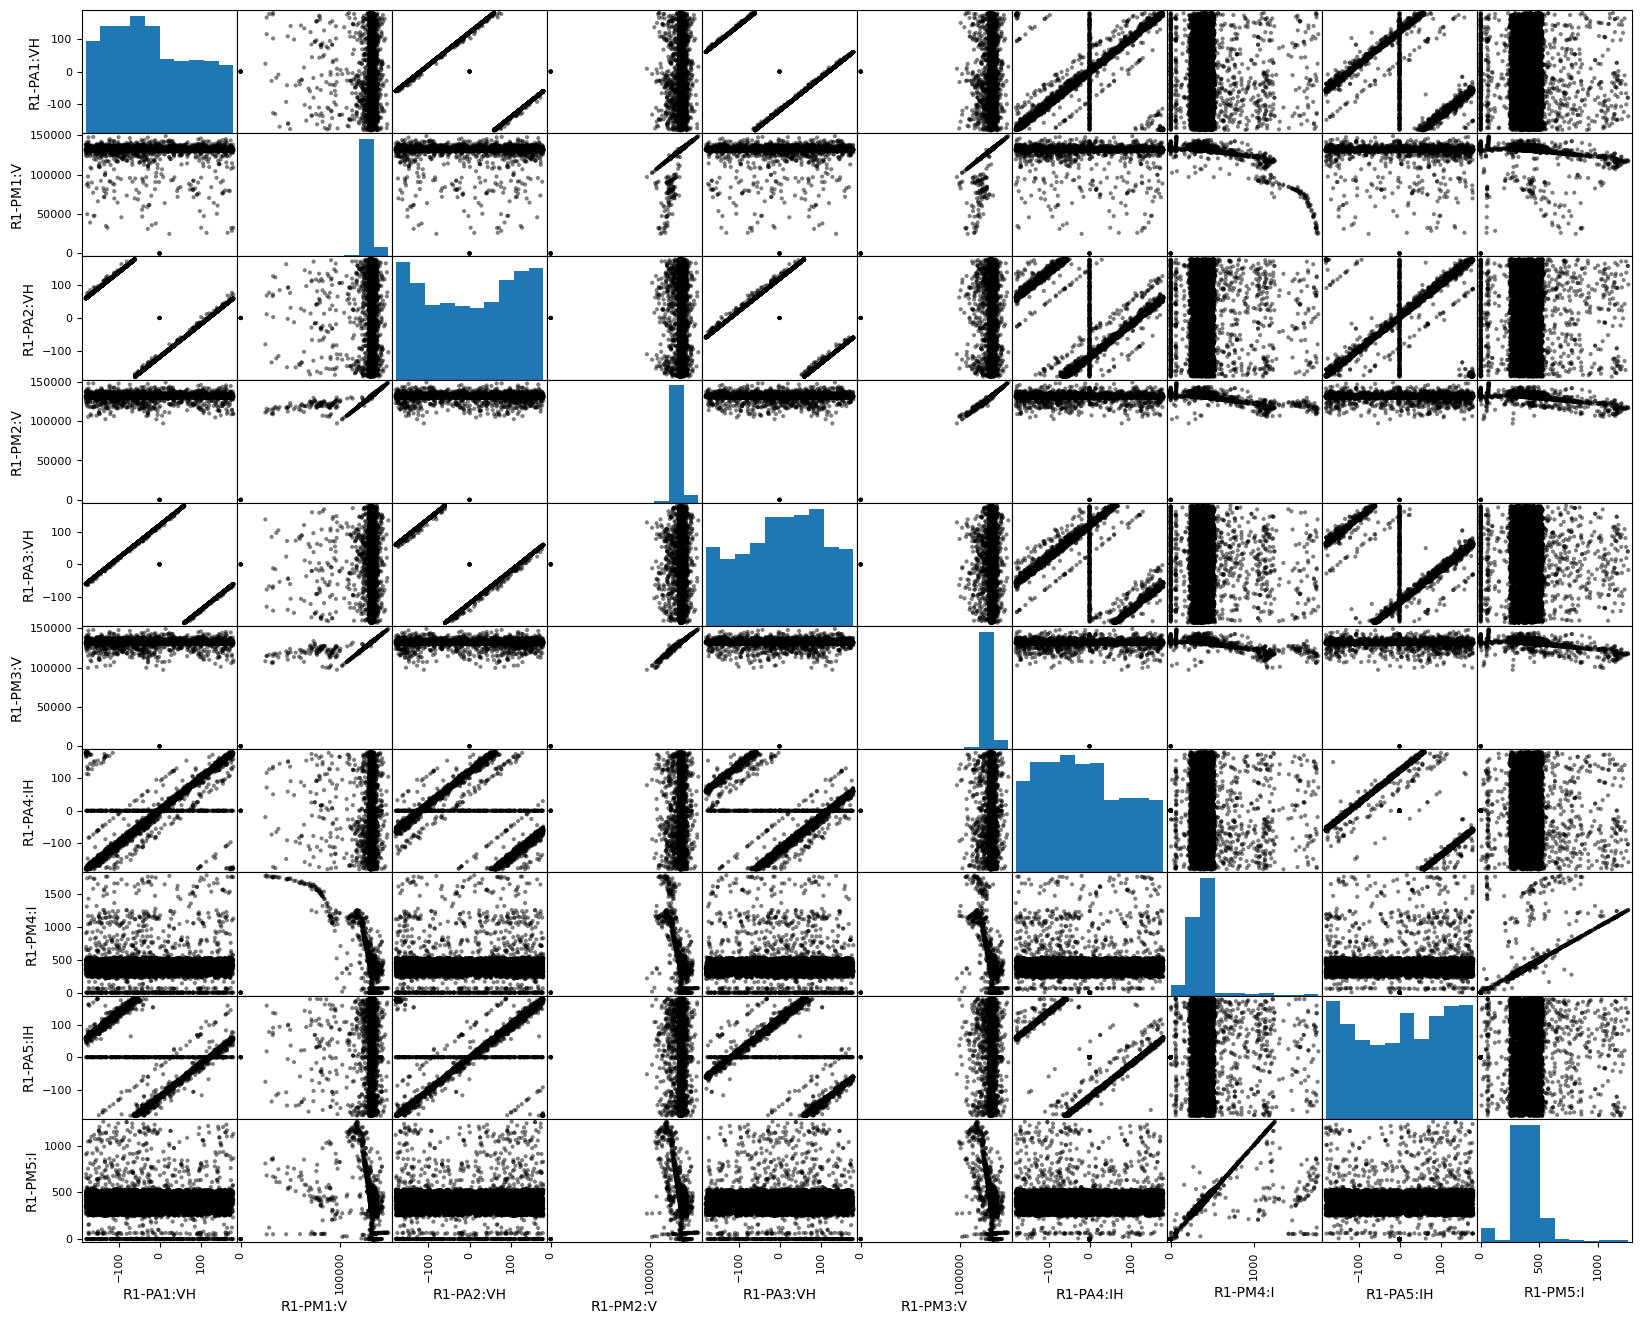

In [20]:
scatter_matrix(data_samp.iloc[:,:10], figsize=(20,16), color='k')
plt.show()

# Data Visualizations

It is good to have insight into the features of the dataset and data visualizations make this possible. In this section. I will attempt to visualize my data in different ways to see if anything reasonable could be inferred from detailed images.

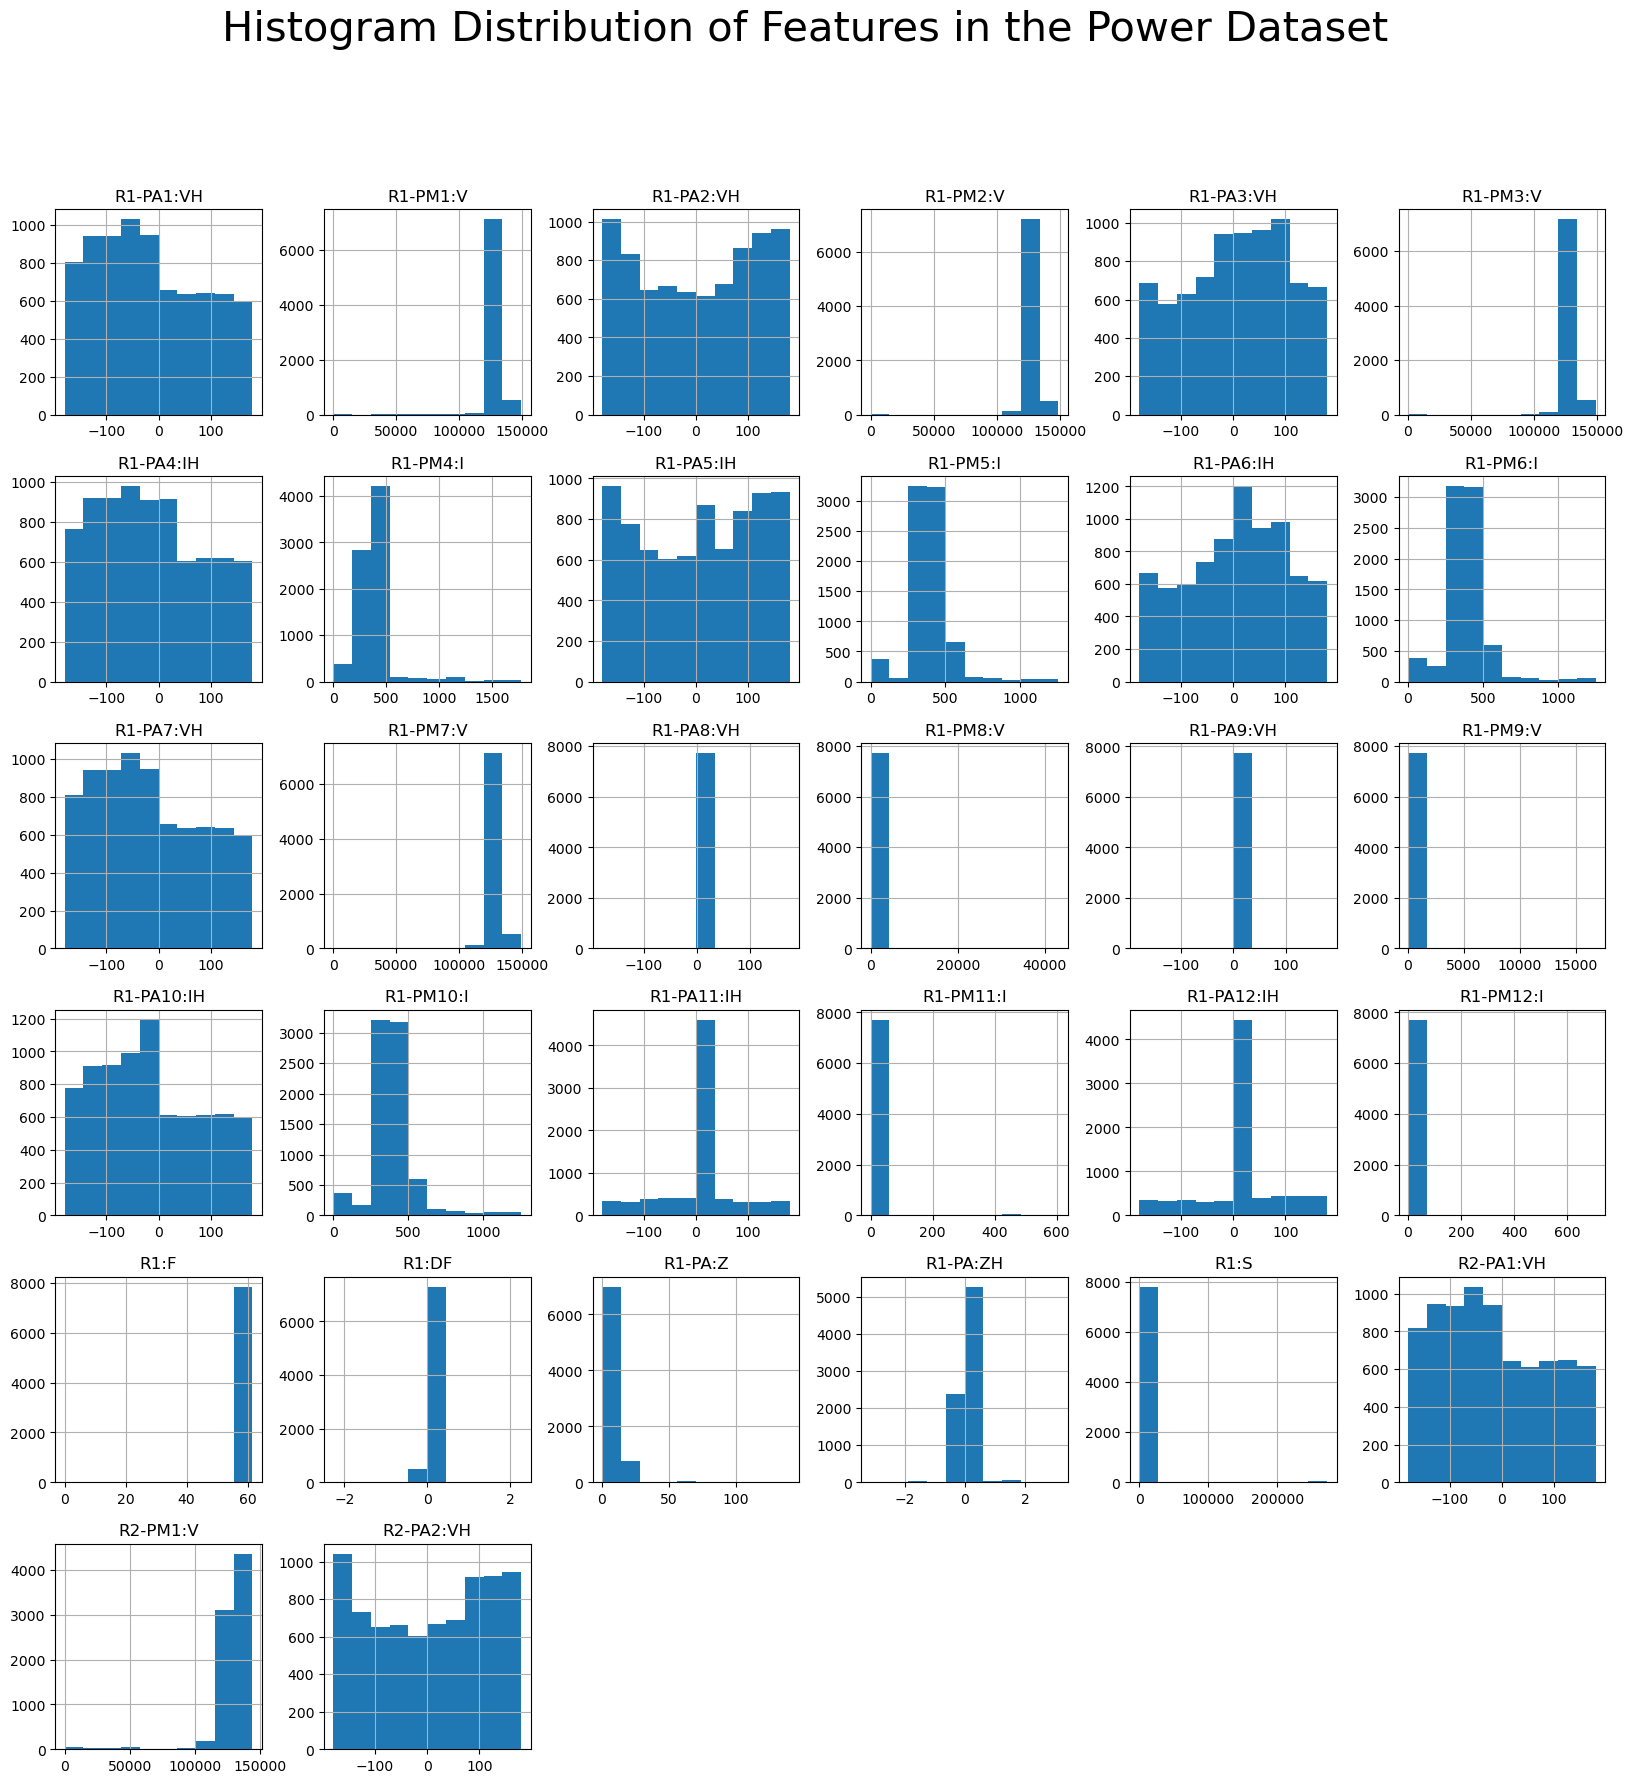

In [21]:
data_samp.iloc[:,:32].hist(figsize=(20,20))
plt.suptitle('Histogram Distribution of Features in the Power Dataset', size=30)
plt.show()

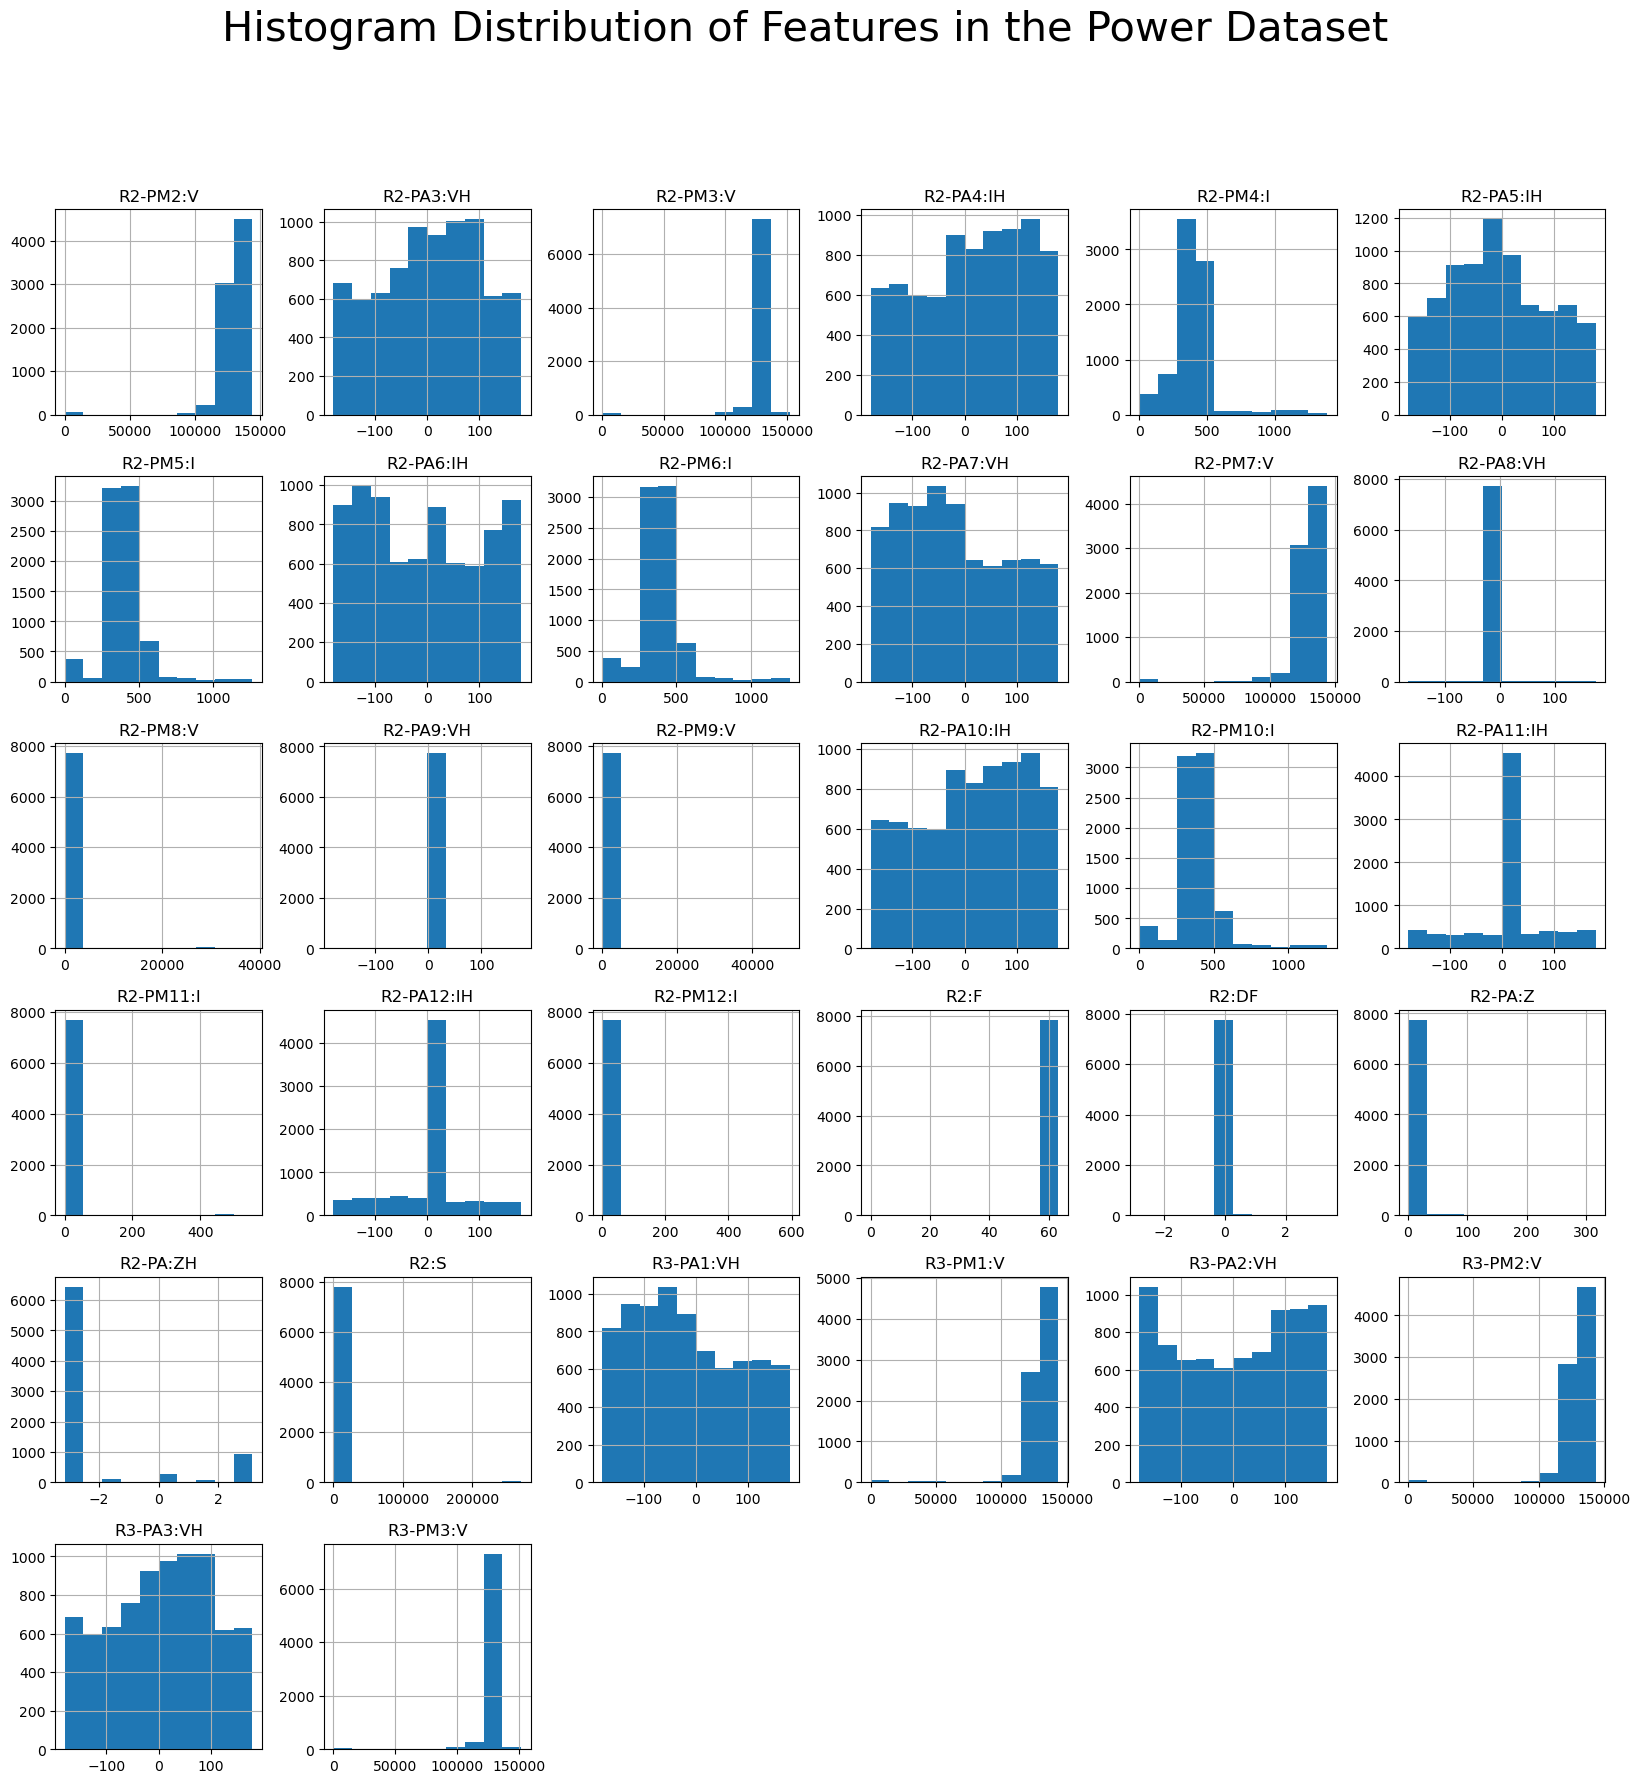

In [22]:
data_samp.iloc[:,32:64].hist(figsize=(20,20))
plt.suptitle('Histogram Distribution of Features in the Power Dataset', size=30)
plt.show()

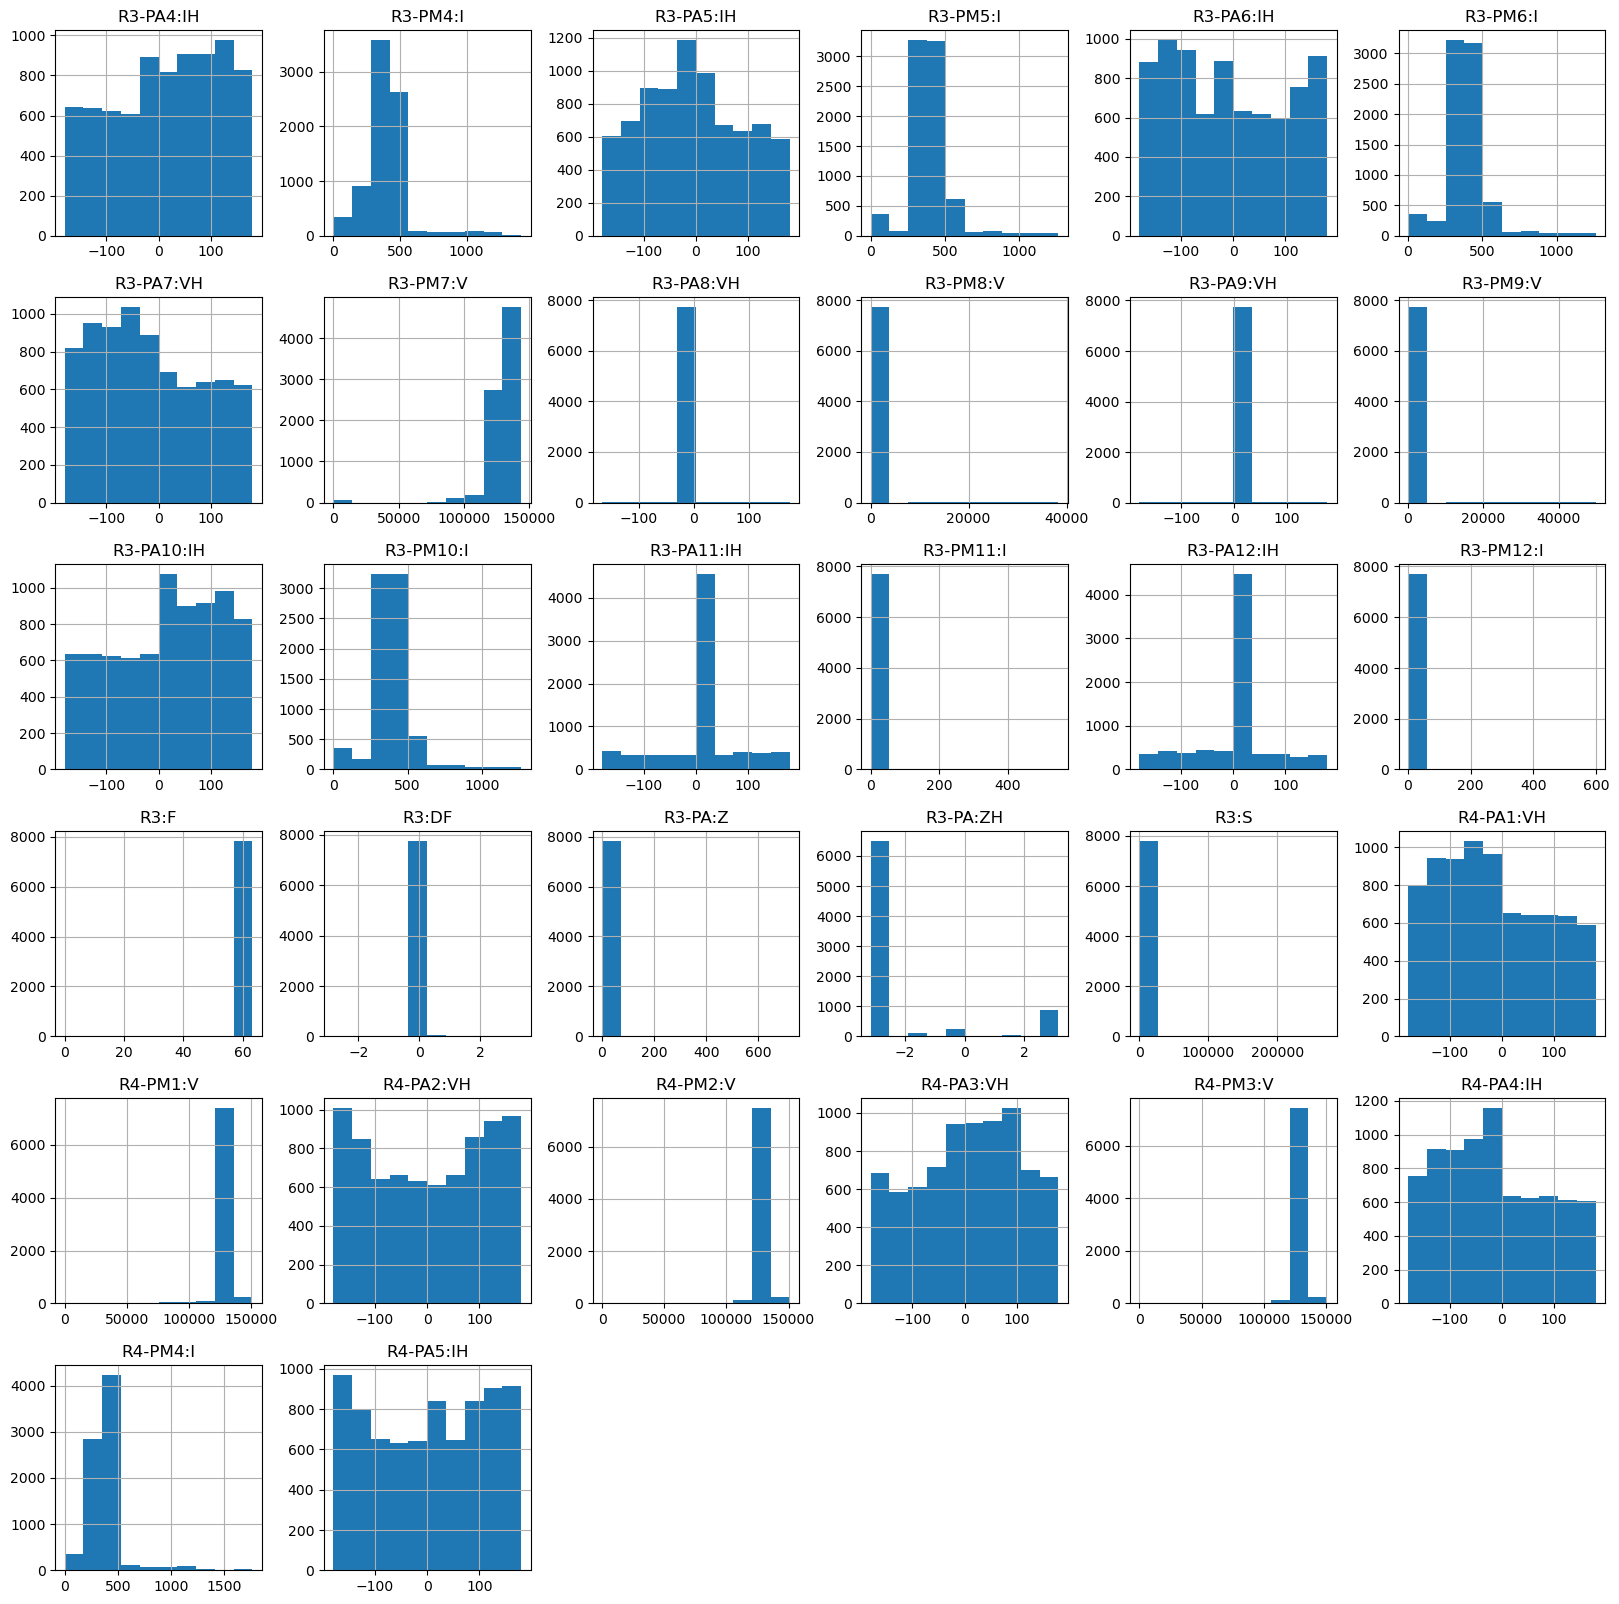

In [23]:
data_samp.iloc[:,64:96].hist(figsize=(20,20))
plt.show()

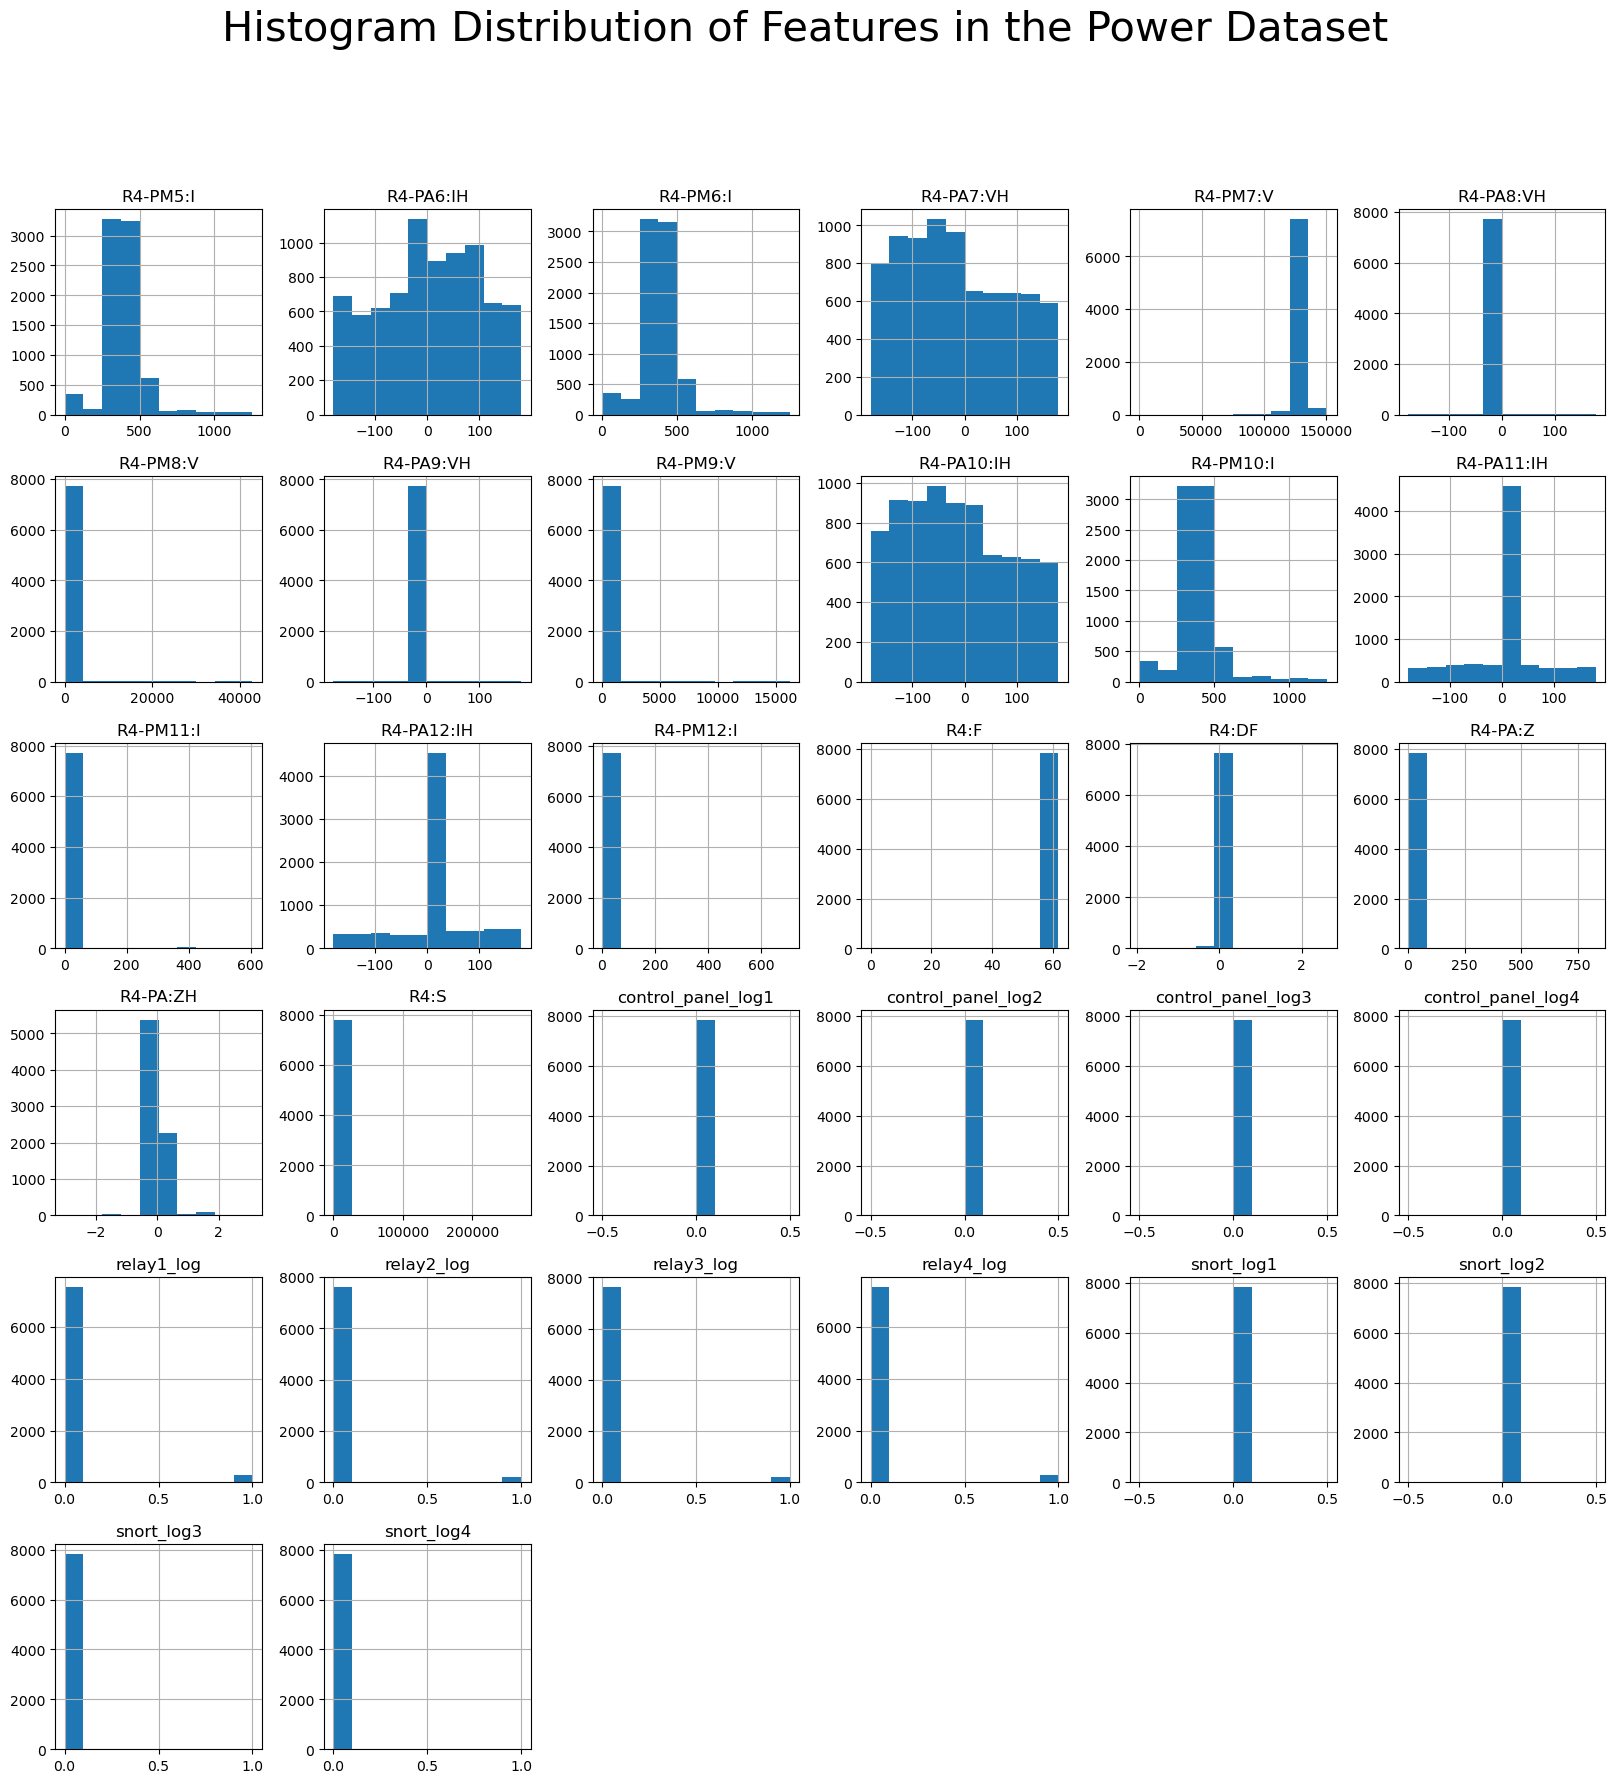

In [24]:
data_samp.iloc[:,96:-1].hist(figsize=(20,20))
plt.suptitle('Histogram Distribution of Features in the Power Dataset', size=30)
plt.show()

The above charts show the distribution of all the features in the dataset. As for the target variable, its histogram depiction is depicted below.

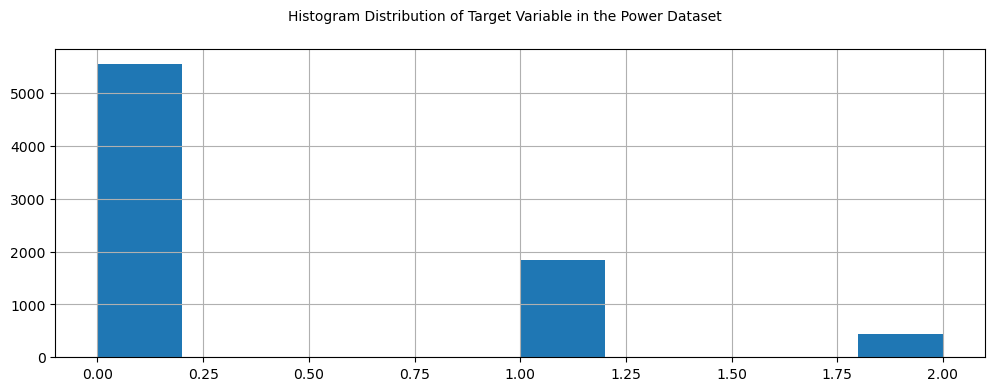

In [123]:
data_samp.iloc[:,-1].hist(figsize=(12,4))
plt.suptitle('Histogram Distribution of Target Variable in the Power Dataset', size=10)
plt.show()

# Justification of Preserving Outliers

From the histogram distribution shown in the figure above, it is clearly shown that over half of the data instances under study were considered as Attack events. This explains why a lot of outliers were present in the distribution. If I removed these outliers, I will be defeating the purpose of this entire machine learning problem, which is to help the power system detect anomalies in its operation.

# Visualization of Probability Distribution of Features 

Before displaying the probability distribution for each function, I will reindex the dataset to prevent future errors from occuring due to duplicate indices as a result of resampling.

In [26]:
data_samp.index = range(data_samp.shape[0]) # reindexing  our dataset to avoid future errors 

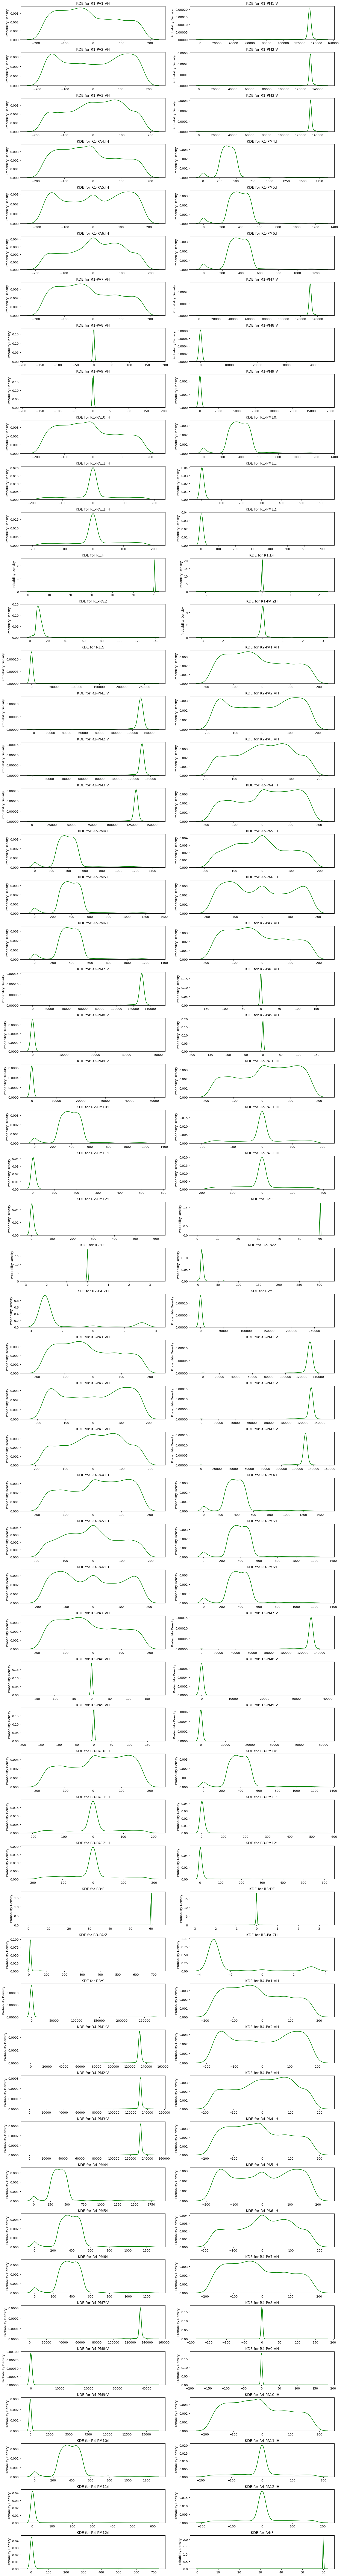

In [27]:
# Probability Distribution of Features
fig, axs = plt.subplots(nrows=56, ncols=2, figsize=(16, 120))
titles = list(data_samp.columns)[:]

axs_feature_pairs = zip(axs.flat, titles)

for axis, feature in axs_feature_pairs:
    sns.kdeplot(x=feature, data=data_samp, palette='muted', ax=axis, color='g')
    axis.set_title(f'KDE for {feature}')
    axis.set_xlabel('')
    axis.set_ylabel('Probability Density')

plt.tight_layout()
plt.show()


The following plots shown above depict the probability distribution of each for the features in the power dataset. However, to see the probability distrubution for the target variable, it needs to be converted from its categorical form to a nominal one. This conversion will be covered in the next section. Nevertheless, you might ask, "why show the probability density plots?" Well, I did so for good reason. Firstly, it gave me an idea of the concetration of values for each of the features. Due to this, I was able to infer if most or all of the features consisted of values in the same range. Unfortunately, they didn't and this informs me that I have to perform data scaling. Without doing this, It will be hard to know if data scaling would be necessary. Secondly, the kde plot shows that a lot of the features do not necessarily follow a normal distribution. This justifies my use of box plots for detection of outliers as data which follows a normal distribution would not necessitate that but instead work well with a calculated zscore.

# <b> Data Preprocessing (Continued) </b>

# Checking for Presence of Categorical Data

Although I know the categorical columns by inspection of the database, It won't hurt to make verifications. From the cell below, it is clear that at least one categorical feature is present in the dataset.

In [28]:
data_types = data_samp.dtypes
if (data_types == object).sum():
    index_val = list(np.where(data_types == object)[0])
    print("There are categorical features in the dataset.")
else:
    print("There are no categorical features in the dataset.")


There are categorical features in the dataset.


# Conversion of Categorical Data to Nominal Data

Since there are categorical features in the dataset as seen above, it needs to be changed into a nominal form so that the necessary exploratory data analysis can be done. I say this because it is impossible for me to obtain a probability distribution of my target variable since it contains categorical values.

In [29]:
cat_fields_cols = data_samp.columns[index_val] # selection of categorical columns
cat_fields = data_samp[cat_fields_cols] # Extraction of categorical data

def conv_nom(feature):
    """
        Converts categorical data to 
        nominal data
    """
    lab_enc = LabelEncoder()
    return lab_enc.fit_transform(feature)

conv_data = cat_fields.apply(conv_nom) # conversion of categorical columns to nominal columns
data_samp.iloc[:,index_val] = conv_data # replacement of categorical columns with nominal columns
data_samp

R1-PA1:VH      R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0     -58.275537  130857.39610 -178.252900  130857.3961   61.770580   
1     -23.726182  132336.71910 -143.715004  132311.6458   96.297017   
2     -46.833570  134768.82630 -166.839580  134091.8480   73.183899   
3     -92.991050   45909.15737  164.966008  117217.5373   23.926718   
4     -35.150961  131810.18040 -155.134053  131158.2754   84.866509   
...          ...           ...         ...          ...         ...   
7833 -125.993419  131760.03390  114.018601  131709.8873   -5.970220   
7834    1.592823  131032.90900 -118.367351  131007.8358  121.621751   
7835 -131.499544  131760.03390  108.518206  131108.1288  -11.470615   
7836  -61.146056  130832.32290  178.860235  130205.4911   58.871413   
7837  -44.627683  131559.44770 -164.616504  130932.6159   75.389787   

         R1-PM3:V   R1-PA4:IH    R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0     130932.6159  -62.016952   492.74901  176.958015  499.89030  ...   
1     132411.9389  -16.736097   241.52209 -141.898728  255.43845  ...   
2     134818.9728  -48.208669   281.62318 -168.140195  282.17251  ...   
3     120677.6485 -147.857489  1714.82515 -107.761902   51.27080  ...   
4     131860.3269  -37.270905   372.44574 -157.328481  372.62885  ...   
...           ...         ...         ...         ...        ...  ...   
7833  131810.1804 -124.635509   352.66986  112.580477  362.37469  ...   
7834  131108.1288   -2.956462   474.98734 -122.847881  476.08600  ...   
7835  131810.1804 -133.751268   381.05191  106.146161  381.60124  ...   
7836  130907.5427  -65.798473   505.93293  174.013012  507.39781  ...   
7837  131609.5942  -45.578793   399.36291 -167.349513  407.05353  ...   

      control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                      0           0           0           0           0   
1                      0           0           0           0           0   
2                      0           0           0           0           0   
3                      0           0           1           0           0   
4                      0           0           0           0           0   
...                  ...         ...         ...         ...         ...   
7833                   0           0           0           0           0   
7834                   0           0           0           0           0   
7835                   0           0           0           0           0   
7836                   0           0           0           0           0   
7837                   0           0           0           0           0   

      snort_log1  snort_log2  snort_log3  snort_log4  marker  
0              0           0           0           0       2  
1              0           0           0           0       0  
2              0           0           0           0       0  
3              0           0           0           0       0  
4              0           0           0           0       0  
...          ...         ...         ...         ...     ...  
7833           0           0           0           0       1  
7834           0           0           0           0       0  
7835           0           0           0           0       0  
7836           0           0           0           0       1  
7837           0           0           0           0       0  

[7838 rows x 129 columns]

In [30]:
data_samp

R1-PA1:VH      R1-PM1:V   R1-PA2:VH     R1-PM2:V   R1-PA3:VH  \
0     -58.275537  130857.39610 -178.252900  130857.3961   61.770580   
1     -23.726182  132336.71910 -143.715004  132311.6458   96.297017   
2     -46.833570  134768.82630 -166.839580  134091.8480   73.183899   
3     -92.991050   45909.15737  164.966008  117217.5373   23.926718   
4     -35.150961  131810.18040 -155.134053  131158.2754   84.866509   
...          ...           ...         ...          ...         ...   
7833 -125.993419  131760.03390  114.018601  131709.8873   -5.970220   
7834    1.592823  131032.90900 -118.367351  131007.8358  121.621751   
7835 -131.499544  131760.03390  108.518206  131108.1288  -11.470615   
7836  -61.146056  130832.32290  178.860235  130205.4911   58.871413   
7837  -44.627683  131559.44770 -164.616504  130932.6159   75.389787   

         R1-PM3:V   R1-PA4:IH    R1-PM4:I   R1-PA5:IH   R1-PM5:I  ...  \
0     130932.6159  -62.016952   492.74901  176.958015  499.89030  ...   
1     132411.9389  -16.736097   241.52209 -141.898728  255.43845  ...   
2     134818.9728  -48.208669   281.62318 -168.140195  282.17251  ...   
3     120677.6485 -147.857489  1714.82515 -107.761902   51.27080  ...   
4     131860.3269  -37.270905   372.44574 -157.328481  372.62885  ...   
...           ...         ...         ...         ...        ...  ...   
7833  131810.1804 -124.635509   352.66986  112.580477  362.37469  ...   
7834  131108.1288   -2.956462   474.98734 -122.847881  476.08600  ...   
7835  131810.1804 -133.751268   381.05191  106.146161  381.60124  ...   
7836  130907.5427  -65.798473   505.93293  174.013012  507.39781  ...   
7837  131609.5942  -45.578793   399.36291 -167.349513  407.05353  ...   

      control_panel_log4  relay1_log  relay2_log  relay3_log  relay4_log  \
0                      0           0           0           0           0   
1                      0           0           0           0           0   
2                      0           0           0           0           0   
3                      0           0           1           0           0   
4                      0           0           0           0           0   
...                  ...         ...         ...         ...         ...   
7833                   0           0           0           0           0   
7834                   0           0           0           0           0   
7835                   0           0           0           0           0   
7836                   0           0           0           0           0   
7837                   0           0           0           0           0   

      snort_log1  snort_log2  snort_log3  snort_log4  marker  
0              0           0           0           0       2  
1              0           0           0           0       0  
2              0           0           0           0       0  
3              0           0           0           0       0  
4              0           0           0           0       0  
...          ...         ...         ...         ...     ...  
7833           0           0           0           0       1  
7834           0           0           0           0       0  
7835           0           0           0           0       0  
7836           0           0           0           0       1  
7837           0           0           0           0       0  

[7838 rows x 129 columns]

From the printout above, we see that the only categorical column caled "markers" has been converted to a nominal form. This column plays a huge role in my analysis and its conversion mapping is shown below: <br>

2: NoEvents <br>
1: Natural  <br>
0: Attack   <br>

# <b> Exploratory Data Analysis (Continued) </b>

# Probability Distribution of Target Variable

Recall earlier that I faced an impediment in computing the probability distribution of the "markers" column due to error issues that arose because of its categorical essence. Now that has been resolved, I will attempt to have a go at it now.

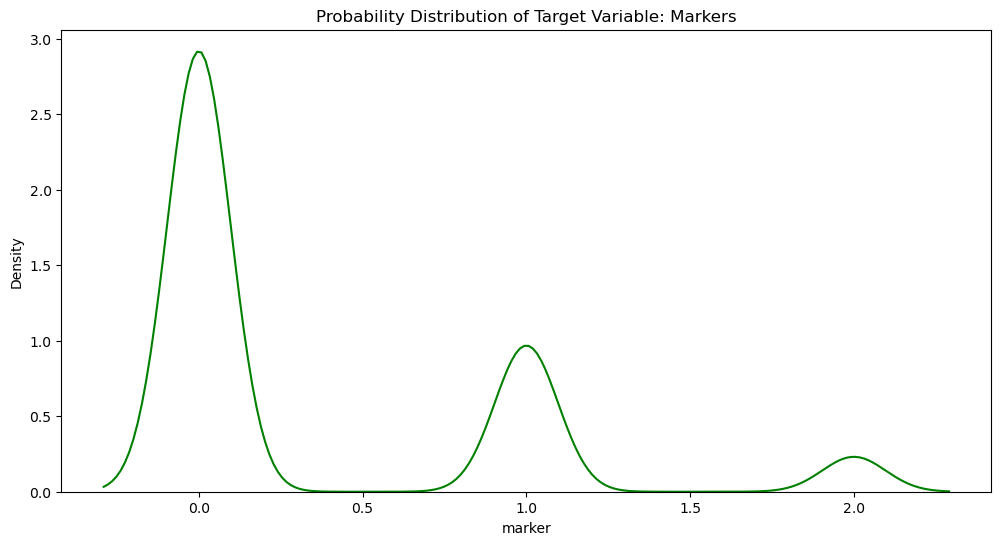

In [31]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=data_samp.columns[-1], data=data_samp, palette='muted',color='g')
plt.title('Probability Distribution of Target Variable: Markers')
plt.show()

The above image depcits the probability density of the markers column which is made up of three normal curves. This graph differs significantly from the previous kde plots behind and shows that data scaling is necessary. The reason for this is obvious. The range of possible values from this plot are 0,1, and 2. However, for some of the features as seen in the KDE plots above, the range of values go from zero to over ten thousand.

# <b>Data Preprocessing (Continued)</b>

# Data Scaling and Standardization

Like I said previously, it is important for me to standardize my data because of the highly differing range of values present among the features. In order not to affect my model negatively, i wqill go ahead and standardize it. I prefer standardization to normalization because it considers my features as a randorm variable and attempts to make them fit a normal idstribution curve which is always a desirable property.  Also, note that <b>I won't be splitting my dataset</b> because the evaluation of my models will be based on crossvalidation.

In [32]:
X = data_samp.iloc[:,:-1] # Selection of my x values or features which are to be standardized
y = data_samp.iloc[:,-1] # selection of my y value

std_scaler = StandardScaler()
X_norm = std_scaler.fit_transform(X)
X_norm

array([[-0.41758386,  0.01641462, -1.62360874, ...,  0.        ,
        -0.01129601, -0.01597599],
       [-0.07327765,  0.18446076, -1.31463568, ...,  0.        ,
        -0.01129601, -0.01597599],
       [-0.30355741,  0.46073998, -1.52150616, ...,  0.        ,
        -0.01129601, -0.01597599],
       ...,
       [-1.14730747,  0.11895125,  0.94182099, ...,  0.        ,
        -0.01129601, -0.01597599],
       [-0.44619039,  0.01356639,  1.57109474, ...,  0.        ,
        -0.01129601, -0.01597599],
       [-0.28157434,  0.09616533, -1.50161871, ...,  0.        ,
        -0.01129601, -0.01597599]])

# <b>Model Creation and Evaluation</b>

# Random Forest Model

In the next cell, I develop a random forest classifier and evaluate its performance using 10-fold crossvalidation.

In [59]:
rand_mod = RandomForestClassifier(random_state=42) # Initialization of random forest model
scores = cross_validate(rand_mod, X_norm, y, cv=10,scoring=('precision_micro', 'recall_micro', 'f1_micro'))

# Extraction of Cross Validation Metrics and Calculation of Mean Metric Scores
prec_micro_score = scores['test_precision_micro']
recall_micro_score = scores['test_recall_micro']
f1_micro_score = scores['test_f1_micro']

crossval_metrics = {'Precision Micro Score':prec_micro_score, 'Recall Micro Score':recall_micro_score, 'F1 Micro Score':f1_micro_score}

# Getting the mean crossvalidation metric for random forest without feature selection
crossval_metrics_mean_unr = {'Mean Precision Micro Score':prec_micro_score.mean(), 'Mean Recall Micro Score':recall_micro_score.mean(), 'Mean F1 Micro Score':f1_micro_score.mean()}

# Display of crossvalidation metrics
cross_metrics_frame = pd.DataFrame(crossval_metrics, index = np.arange(1,11))
cross_metrics_frame.index.name = 'K Fold Number'
print(f"The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.\n")
print(cross_metrics_frame)
print(f"\nThe mean crossvalidation metric scores for the random forest model are: {crossval_metrics_mean_unr}")

The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.

               Precision Micro Score  Recall Micro Score  F1 Micro Score
K Fold Number                                                           
1                           0.789541            0.789541        0.789541
2                           0.827806            0.827806        0.827806
3                           0.806122            0.806122        0.806122
4                           0.809949            0.809949        0.809949
5                           0.827806            0.827806        0.827806
6                           0.818878            0.818878        0.818878
7                           0.806122            0.806122        0.806122
8                           0.811224            0.811224        0.811224
9                           0.804598            0.804598        0.804598
10                          0.818646            0.818646        0.818646

The mean cross

The results of my crossvalidation for the random forest model are shown in the table above. The precision score gives an idea of the average percentage of classes that were classified correctly for the classes in question. The recall micro score, on the other hand, gives the average percentage of how often the classifier identifies a given class out of the possible options involved in classifying it. As for the reason for why I chose these metrics, the explanation would be given later on. However, note that the precision, recall and consequentially f1-scores are strangely equal. Well, this is because the sum of true positives and false positives across all the classes is equal to the sum of true positive and false negatives across all the classes as well. The reason for the same scores for all three parameters is due to the way  micro-averaging works. A micro-averaging metric calculation involves the use of the true positives, true negatives, false positives and false negatives for all the classes. As a result, the recall and f1-score will be equal to the precision for all micro-averaged results. If it was a macro-averaged process, the results would be different because macro-averaging treats all classes equally unlike micro-averaging which favours the majority sample in the class distribution.

# Logistic Regression Model

In [60]:
log_mod = LogisticRegression(multi_class='multinomial', random_state=42) # Initialization of Multinomial Logistic Regression Model
scores = cross_validate(log_mod, X_norm, y, cv=10,scoring=('precision_micro', 'recall_micro', 'f1_micro'))

# Extraction of Cross Validation Metrics and Calculation of Mean Metric Scores
prec_micro_score = scores['test_precision_micro']
recall_micro_score = scores['test_recall_micro']
f1_micro_score = scores['test_f1_micro']

crossval_metrics = {'Precision Micro Score':prec_micro_score, 'Recall Micro Score':recall_micro_score, 'F1 Micro Score':f1_micro_score}


# Getting the mean crossvalidation metric for logistic regression model without feature selection
crossval_metrics_mean_unl = {'Mean Precision Micro Score':prec_micro_score.mean(), 'Mean Recall Micro Score':recall_micro_score.mean(), 'Mean F1 Micro Score':f1_micro_score.mean()}

# Display of crossvalidation metrics
cross_metrics_frame = pd.DataFrame(crossval_metrics, index = np.arange(1,11))
cross_metrics_frame.index.name = 'K Fold Number'
print(f"The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.\n")
print(cross_metrics_frame)
print(f"\nThe mean crossvalidation metric scores for the Logistic Regression model are: {crossval_metrics_mean_unl}")

The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.

               Precision Micro Score  Recall Micro Score  F1 Micro Score
K Fold Number                                                           
1                           0.704082            0.704082        0.704082
2                           0.704082            0.704082        0.704082
3                           0.716837            0.716837        0.716837
4                           0.693878            0.693878        0.693878
5                           0.719388            0.719388        0.719388
6                           0.719388            0.719388        0.719388
7                           0.702806            0.702806        0.702806
8                           0.728316            0.728316        0.728316
9                           0.721584            0.721584        0.721584
10                          0.716475            0.716475        0.716475

The mean cross

The results of my crossvalidation for the logistic regression model is shown in the table above. The precision score gives an idea of the average percentage of classes that were classified correctly for the classes in question. The recall micro score, on the other hand, gives the average percentage of how often the classifier identifies a given class out of the possible options involved in classifying it.  As expected, the precision scores are equal to the recall and f1-scores since I am implementing a micro-averaging process. However, the average scores for these metrics lies around 71% which is lower than that of the random forest model above.

# K-Nearest Neighbors

In [61]:
knn_mod = KNeighborsClassifier() # Initialization of KNN Model
scores = cross_validate(knn_mod, X_norm, y, cv=10,scoring=('precision_micro', 'recall_micro', 'f1_micro'))

# Extraction of Cross Validation Metrics and Calculation of Mean Metric Scores
prec_micro_score = scores['test_precision_micro']
recall_micro_score = scores['test_recall_micro']
f1_micro_score = scores['test_f1_micro']

crossval_metrics = {'Precision Micro Score':prec_micro_score, 'Recall Micro Score':recall_micro_score, 'F1 Micro Score':f1_micro_score}


# Getting the mean crossvalidation metric for KNN model without feature selection
crossval_metrics_mean_unk = {'Mean Precision Micro Score':prec_micro_score.mean(), 'Mean Recall Micro Score':recall_micro_score.mean(), 'Mean F1 Micro Score':f1_micro_score.mean()}

# Display of crossvalidation metrics
cross_metrics_frame = pd.DataFrame(crossval_metrics, index = np.arange(1,11))
cross_metrics_frame.index.name = 'K Fold Number'
print(f"The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.\n")
print(cross_metrics_frame)
print(f"\nThe mean crossvalidation metric scores for the KNN model are: {crossval_metrics_mean_unk}")

The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.

               Precision Micro Score  Recall Micro Score  F1 Micro Score
K Fold Number                                                           
1                           0.702806            0.702806        0.702806
2                           0.716837            0.716837        0.716837
3                           0.700255            0.700255        0.700255
4                           0.704082            0.704082        0.704082
5                           0.730867            0.730867        0.730867
6                           0.714286            0.714286        0.714286
7                           0.716837            0.716837        0.716837
8                           0.710459            0.710459        0.710459
9                           0.716475            0.716475        0.716475
10                          0.712644            0.712644        0.712644

The mean cross

The results of my crossvalidation for the logistic regression model is shown in the table above. The precision score gives an idea of the average percentage of classes that were classified correctly for the classes in question. The recall micro score, on the other hand, gives the average percentage of how often the classifier identifies a given class out of the possible options involved in classifying it.  As expected, the precision scores are equal to the recall and f1-scores since I am implementing a micro-averaging process. However, the average scores for these metrics also lies around 71% like the logistic regression model but with a slightly lower performance.

# Reason for Choosing Micro-Averaged Precision, Recall and F1-Scores

For multi-class problems, basic precision, recall and f1-score algorithms do not work as they are usually defined for a binary class. This leaves me with two of the most common options: a micro-averaged precision, recall and f1-score or a macro-averaged precision, recall and f1-score. Now, the micro-averaged scores are based on estimating the positives and negatives for each class and then using that to estimate the scores overall. However, for the macro-averaged scores, the precision, recall, and f1-score are calculated for each class independently and then averaged. The implication of this is that micro-averaged scores are affected by the majority class, whereas macro-averaged scores are not as they consider each class equally. Since the priority for this problem is identifying both 'natural' and 'atatck' events which are the majority classes, the micro-averaged process is better. The cost of misidentifying Attack and Natural events strongly outweighs that of NoEvents. Hence, it is important to place priority on those classes. As a result, the micro-averaging process was used. One thing should be noted however, is that the precision, recall and f1-scores for a micro-averaged process would be the same due to the structure of the formula. Since the value of the denominator would be the same for both precision and recall, their scores would inevitably be the same. This also influences th resultant f1-score which would also have a similar value.

# <b>Feature Selection and Engineering</b>

# Feature Selection for Random Forest Model

Below is the my feature selection for the random forest classifier. This method is performed by the random forest model which gets a list of feature the model considers important. If the calcuated importance of any feature exceeds the mean feature importance, that feature is selected to be a part of the model. 

In [36]:
# Model Selection for Random Forest Classifier using SelectFromModel
# SelectFromModel selects all the features whose importance exceeds the average importance

feature_rf_mod = RandomForestClassifier(random_state=42)
selec_mod = SelectFromModel(feature_rf_mod)
selec_mod.fit(X_norm, y)
selec_features_rf = list(X.columns[selec_mod.get_support()])
features_rf_index = selec_mod.get_support()
print(f'The selected features for the random forest classifier are: {selec_features_rf}')

The selected features for the random forest classifier are: ['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH', 'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I', 'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA10:IH', 'R1-PM10:I', 'R1-PA:Z', 'R1-PA:ZH', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH', 'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I', 'R2-PA7:VH', 'R2-PM7:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA:Z', 'R2-PA:ZH', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V', 'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH', 'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V', 'R3-PA10:IH', 'R3-PM10:I', 'R3-PA:Z', 'R3-PA:ZH', 'R4-PA1:VH', 'R4-PM1:V', 'R4-PA2:VH', 'R4-PM2:V', 'R4-PA3:VH', 'R4-PM3:V', 'R4-PA4:IH', 'R4-PM4:I', 'R4-PA5:IH', 'R4-PM5:I', 'R4-PA6:IH', 'R4-PM6:I', 'R4-PA7:VH', 'R4-PM7:V', 'R4-PA10:IH', 'R4-PM10:I', 'R4-PA:Z', 'R4-PA:ZH']


From the chart below, the selected features are features whose importance exceed the mean importance. As obtained earlier and as verified from this graph, the features selected are 72 in number and are listed below:

['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PM2:V', 'R1-PA3:VH', 'R1-PM3:V', 'R1-PA4:IH', 'R1-PM4:I', 'R1-PA5:IH', 'R1-PM5:I', 'R1-PA6:IH', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA10:IH', 'R1-PM10:I', 'R1-PA:Z', 'R1-PA:ZH', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PA2:VH', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA4:IH', 'R2-PM4:I', 'R2-PA5:IH', 'R2-PM5:I', 'R2-PA6:IH', 'R2-PM6:I', 'R2-PA7:VH', 'R2-PM7:V', 'R2-PA10:IH', 'R2-PM10:I', 'R2-PA:Z', 'R2-PA:ZH', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PA2:VH', 'R3-PM2:V', 'R3-PA3:VH', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PA5:IH', 'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V', 'R3-PA10:IH', 'R3-PM10:I', 'R3-PA:Z', 'R3-PA:ZH', 'R4-PA1:VH', 'R4-PM1:V', 'R4-PA2:VH', 'R4-PM2:V', 'R4-PA3:VH', 'R4-PM3:V', 'R4-PA4:IH', 'R4-PM4:I', 'R4-PA5

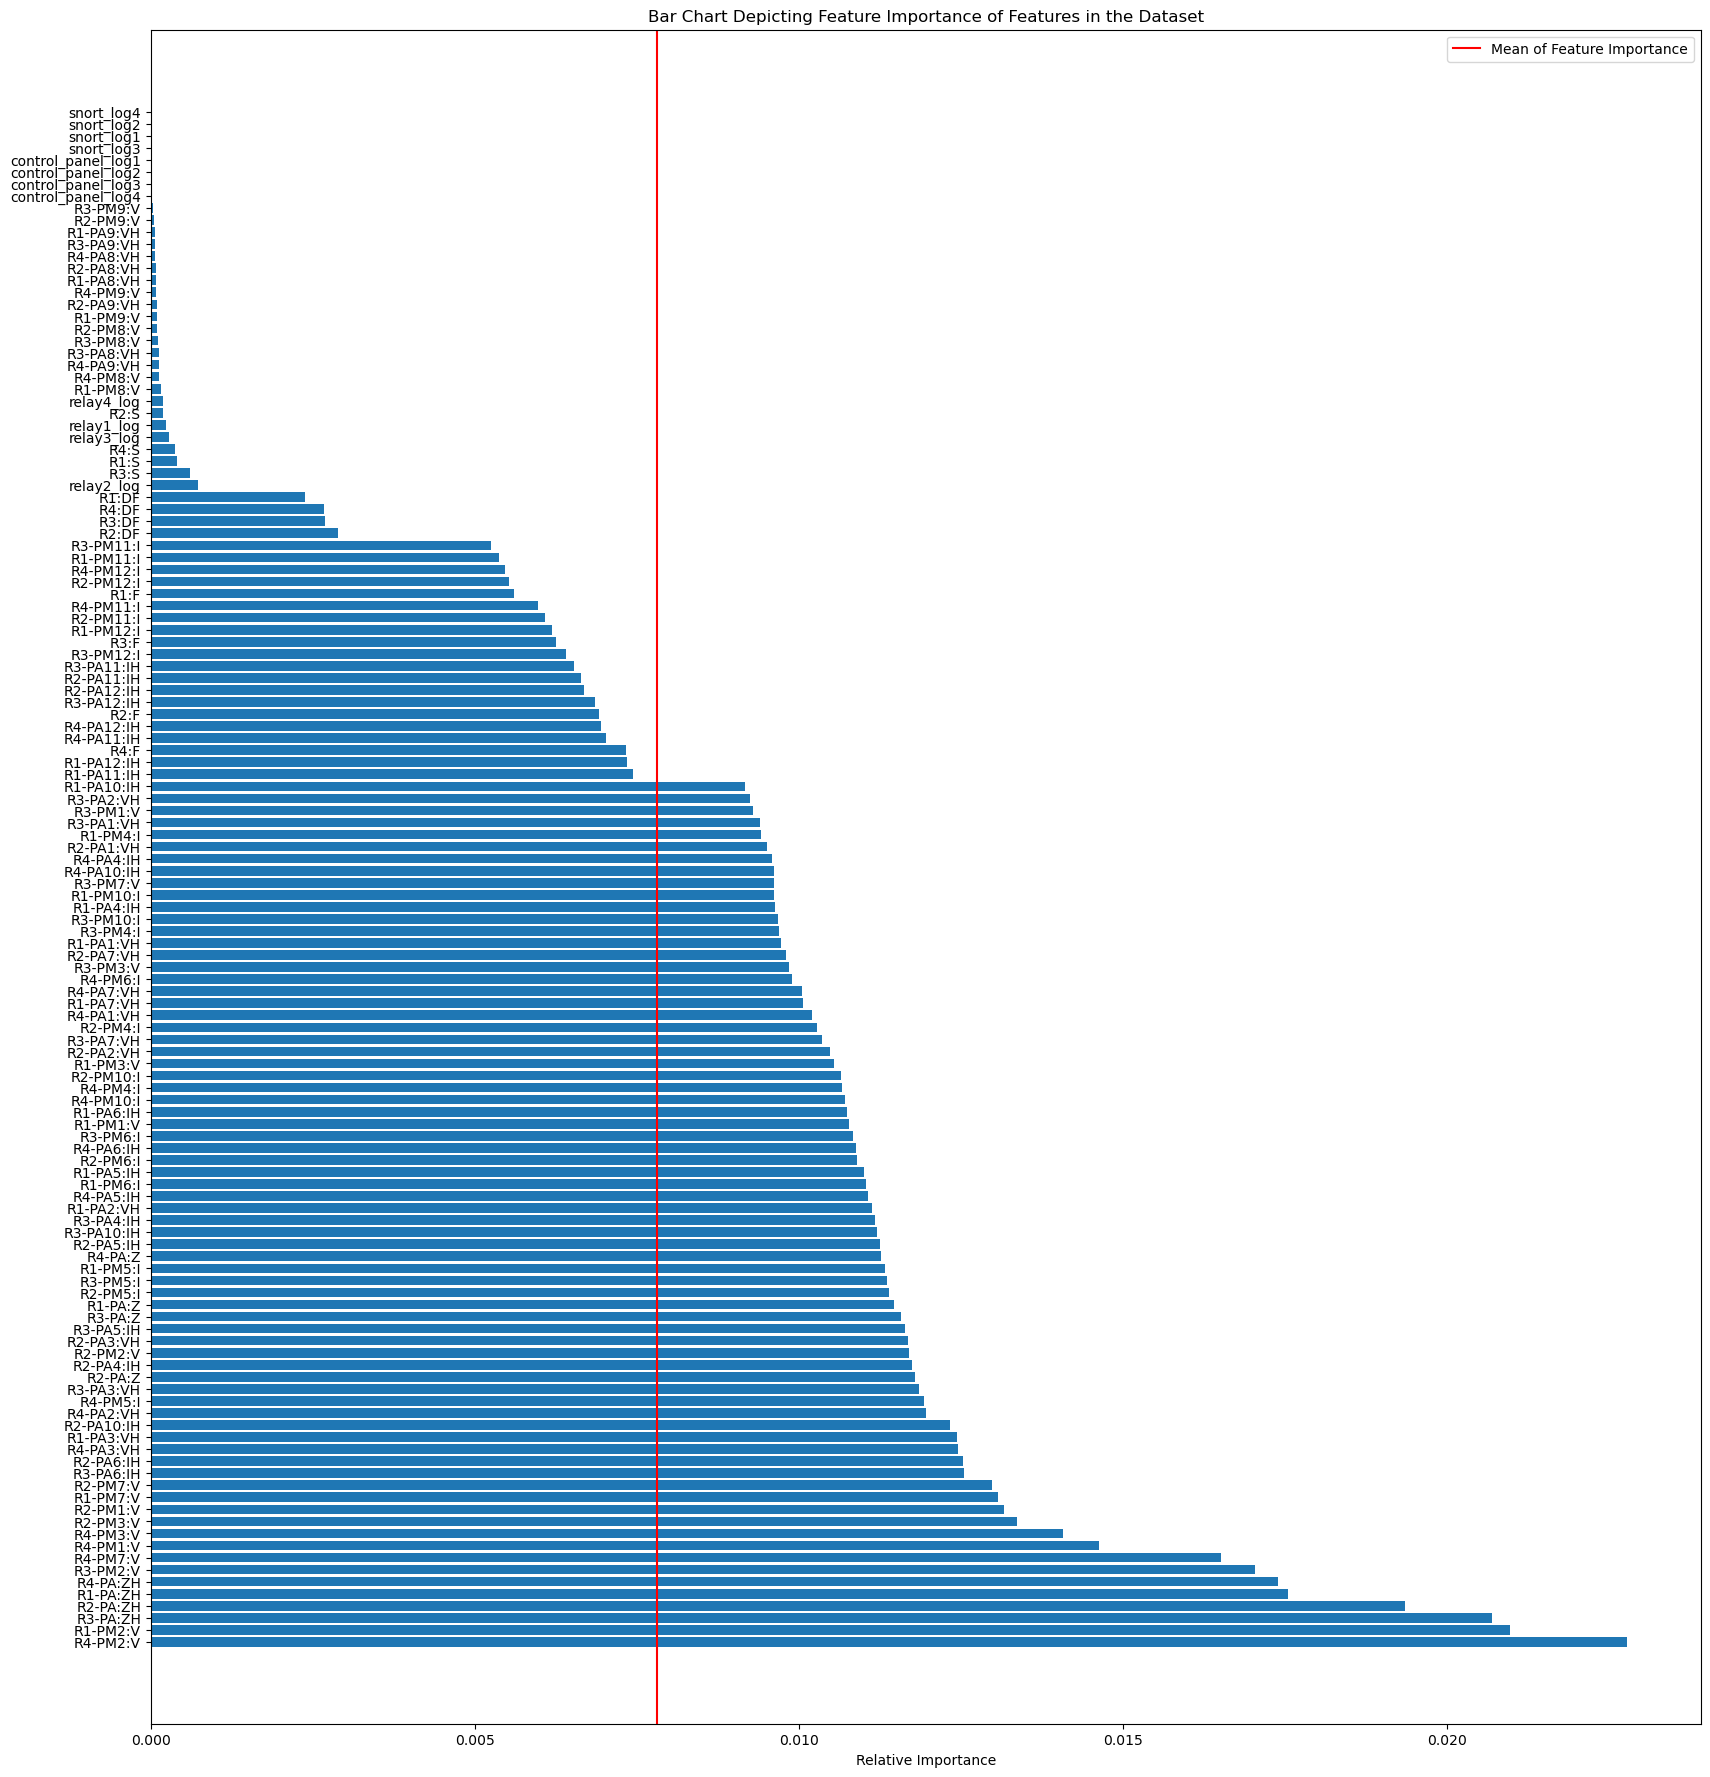

In [37]:
feature_rf_mod.fit(X_norm, y) # Fitting of chosen model
importance = feature_rf_mod.feature_importances_ # Getting the relative importance of fatures
mean_importance = importance.mean() # Getting the mean importance

importance_indices = np.argsort(importance)[::-1]
importance = importance[importance_indices]

print("From the chart below, the selected features are features whose importance exceed the mean importance. ", end='')
print(f"As obtained earlier and as verified from this graph, the features selected are {len(selec_features_rf)} in number and are listed below:\n\n\
{selec_features_rf}")


print(len(selec_features_rf))

# Plotting the Feature importances
plt.figure(figsize = (20,22))
plt.title("Bar Chart Depicting Feature Importance of Features in the Dataset")
plt.barh(range(len(importance)), importance)
plt.axvline(mean_importance, color='r', label = 'Mean of Feature Importance')
plt.yticks(range(len(importance)), X.columns[importance_indices])
plt.xlabel('Relative Importance')
plt.legend()
plt.show()

# Feature Selection for Logistic Regression

To select features from the logistic regression model, I use Recursive Feature Elimination. This process recursively discards features while developing the model on the features it has left untouched. My reason for using this method is because it is directly accessible from SkLearn and is very fast. Lastly, I chose 72 features to be selected since the random forest model optimally decided this through its feature importance scheme.

In [38]:
# Feature selection for Logistic Regression Model using Recursive Feature Elimination
log_mod = LogisticRegression(multi_class='multinomial', random_state=42) # initialization of logistic regression classifier
rfe_log = RFE(estimator=log_mod, n_features_to_select= 72) # Initializing recursive feature elimination
rfe_log = rfe_log.fit(X_norm, y)
selec_feat_logindex = rfe_log.support_
features_log = list(X.columns[selec_feat_logindex]) # Selecting features
print(f'The selected features for the Logistic Regression classifier are: {features_log}')


The selected features for the Logistic Regression classifier are: ['R1-PM1:V', 'R1-PM2:V', 'R1-PM3:V', 'R1-PM4:I', 'R1-PM5:I', 'R1-PM6:I', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PA8:VH', 'R1-PM8:V', 'R1-PA9:VH', 'R1-PM11:I', 'R1-PM12:I', 'R1:F', 'R1-PA:Z', 'R1-PA:ZH', 'R1:S', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PM2:V', 'R2-PM3:V', 'R2-PM4:I', 'R2-PM5:I', 'R2-PA7:VH', 'R2-PM7:V', 'R2-PM8:V', 'R2-PM9:V', 'R2-PM11:I', 'R2-PM12:I', 'R2:F', 'R2:DF', 'R2:S', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PM2:V', 'R3-PM3:V', 'R3-PA4:IH', 'R3-PM4:I', 'R3-PM5:I', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V', 'R3-PM8:V', 'R3-PM9:V', 'R3-PA10:IH', 'R3-PM10:I', 'R3-PM11:I', 'R3-PM12:I', 'R3:F', 'R3:DF', 'R3-PA:Z', 'R3:S', 'R4-PM1:V', 'R4-PM2:V', 'R4-PM3:V', 'R4-PM4:I', 'R4-PM5:I', 'R4-PM6:I', 'R4-PA8:VH', 'R4-PM8:V', 'R4-PA9:VH', 'R4-PM9:V', 'R4-PA10:IH', 'R4-PM10:I', 'R4-PM11:I', 'R4-PM12:I', 'R4:F', 'R4:S', 'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log']


# Feature Selection for K-Nearest Neighbors Model

To select features from the KNN model, I use a univariate feature selection method which works without the need to build a KNN model. Because of the high dimensionality of the dataset, methods like feature selection can take way over 30 minutes to run. Hence, I decided to perform a basic univariate test which gets rid of features that are considered redundant. These features would then be used with our KNN model later on. As you will see in the following cell, the feature selection process for the KNN model takes an average of less than 0.5 seconds to run.

In [56]:
skb=SelectKBest(f_classif, k=72) # Selecting 72 features using f_classif to perform univariate selection.
X_norm_transformed =skb.fit_transform(X_norm, y) # Transformed X dataset
knn_features_index = skb.get_support() # Getting the feature mask to know what features have been chosen.
print(f'The selected features for use with the KNN model are: {list(X.columns[knn_features_index])}')

The selected features for use with the KNN model are: ['R1-PA1:VH', 'R1-PM1:V', 'R1-PA2:VH', 'R1-PA3:VH', 'R1-PA5:IH', 'R1-PA6:IH', 'R1-PA7:VH', 'R1-PM7:V', 'R1-PM8:V', 'R1-PM9:V', 'R1-PA11:IH', 'R1-PM11:I', 'R1-PM12:I', 'R1-PA:Z', 'R2-PA1:VH', 'R2-PM1:V', 'R2-PM2:V', 'R2-PA3:VH', 'R2-PM3:V', 'R2-PA5:IH', 'R2-PA6:IH', 'R2-PA7:VH', 'R2-PM7:V', 'R2-PM8:V', 'R2-PM9:V', 'R2-PM11:I', 'R2-PM12:I', 'R2:DF', 'R2-PA:Z', 'R2-PA:ZH', 'R3-PA1:VH', 'R3-PM1:V', 'R3-PM2:V', 'R3-PA3:VH', 'R3-PM3:V', 'R3-PA5:IH', 'R3-PM5:I', 'R3-PA6:IH', 'R3-PM6:I', 'R3-PA7:VH', 'R3-PM7:V', 'R3-PM8:V', 'R3-PM9:V', 'R3-PM10:I', 'R3-PM11:I', 'R3-PM12:I', 'R3:DF', 'R3-PA:Z', 'R3-PA:ZH', 'R4-PA1:VH', 'R4-PA2:VH', 'R4-PM2:V', 'R4-PA3:VH', 'R4-PM3:V', 'R4-PA5:IH', 'R4-PM5:I', 'R4-PA6:IH', 'R4-PM6:I', 'R4-PA7:VH', 'R4-PM7:V', 'R4-PM8:V', 'R4-PM9:V', 'R4-PM10:I', 'R4-PA11:IH', 'R4-PM11:I', 'R4-PA12:IH', 'R4-PM12:I', 'R4-PA:Z', 'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log']


# Random Forest Model with Selected Features

Having selected the necessary futures for all three models, the cell below includes the design of a new random forest model using those selected features, which are about 72 in number.

In [41]:
# Random Forest Model with Feature Selection
rand_mod = RandomForestClassifier(random_state=42) # Initialization of random forest model

# Running random forest model with crossvalidation and using selected features
scores_feature_rf = cross_validate(rand_mod, X_norm[:,features_rf_index], y, cv=10,scoring=('precision_micro', 'recall_micro', 'f1_micro')) 

# Extraction of Cross Validation Metrics and Calculation of Mean Metric Scores
prec_micro_score = scores_feature_rf['test_precision_micro']
recall_micro_score = scores_feature_rf['test_recall_micro']
f1_micro_score = scores_feature_rf['test_f1_micro']

crossval_metrics = {'Precision Micro Score':prec_micro_score, 'Recall Micro Score':recall_micro_score, 'F1 Micro Score':f1_micro_score}
crossval_metrics_mean_feature_rf = {'Mean Precision Micro Score':prec_micro_score.mean(), 'Mean Recall Micro Score':recall_micro_score.mean(), 'Mean F1 Micro Score':f1_micro_score.mean()}

# Display of crossvalidation metrics
cross_metrics_frame_feature_rf = pd.DataFrame(crossval_metrics, index = np.arange(1,11))
cross_metrics_frame.index.name = 'K Fold Number'
print(f"The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.\n")
print(cross_metrics_frame_feature_rf)
print(f"\nThe mean crossvalidation metric scores for the random forest model using selected features are: {crossval_metrics_mean_feature_rf}")

The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.

    Precision Micro Score  Recall Micro Score  F1 Micro Score
1                0.801020            0.801020        0.801020
2                0.816327            0.816327        0.816327
3                0.815051            0.815051        0.815051
4                0.804847            0.804847        0.804847
5                0.829082            0.829082        0.829082
6                0.821429            0.821429        0.821429
7                0.809949            0.809949        0.809949
8                0.816327            0.816327        0.816327
9                0.809706            0.809706        0.809706
10               0.822478            0.822478        0.822478

The mean crossvalidation metric scores for the random forest model using selected features are: {'Mean Precision Micro Score': 0.8146214520290875, 'Mean Recall Micro Score': 0.8146214520290875, 'Mean F1 Micro

The metrics of these results indicate the performance of the random model with feature selection in place. As can be seen, my model performs slightly better with a performance of 81.5% across all the metrics. Although this is an improved performance, the difference is slight and is on a level of about 0.3%.

# Logistic Regression Model with Selected Features

This section involves the development of a logistic regression model based on the selected features in the previous section.

In [42]:
log_mod = LogisticRegression(multi_class='multinomial', random_state=42) # Initialization of Multinomial Logistic Regression Model

# 10-Fold Crossvalidation using selected features
scores = cross_validate(log_mod, X_norm[:,selec_feat_logindex], y, cv=10,scoring=('precision_micro', 'recall_micro', 'f1_micro'))

# Extraction of Cross Validation Metrics and Calculation of Mean Metric Scores
prec_micro_score = scores['test_precision_micro']
recall_micro_score = scores['test_recall_micro']
f1_micro_score = scores['test_f1_micro']

crossval_metrics = {'Precision Micro Score':prec_micro_score, 'Recall Micro Score':recall_micro_score, 'F1 Micro Score':f1_micro_score}
crossval_metrics_mean_log_feature = {'Mean Precision Micro Score':prec_micro_score.mean(), 'Mean Recall Micro Score':recall_micro_score.mean(), 'Mean F1 Micro Score':f1_micro_score.mean()}

# Display of crossvalidation metrics
cross_metrics_frame_log_feature = pd.DataFrame(crossval_metrics, index = np.arange(1,11))
cross_metrics_frame.index.name = 'K Fold Number'
print(f"The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.\n")
print(cross_metrics_frame_log_feature)
print(f"\nThe mean crossvalidation metric scores for the Logistic Regression model are: {crossval_metrics_mean_log_feature}")

The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.

    Precision Micro Score  Recall Micro Score  F1 Micro Score
1                0.701531            0.701531        0.701531
2                0.700255            0.700255        0.700255
3                0.711735            0.711735        0.711735
4                0.706633            0.706633        0.706633
5                0.707908            0.707908        0.707908
6                0.715561            0.715561        0.715561
7                0.707908            0.707908        0.707908
8                0.727041            0.727041        0.727041
9                0.710089            0.710089        0.710089
10               0.716475            0.716475        0.716475

The mean crossvalidation metric scores for the Logistic Regression model are: {'Mean Precision Micro Score': 0.7105135924101442, 'Mean Recall Micro Score': 0.7105135924101442, 'Mean F1 Micro Score': 0.7105135

The results shown above indicate the implementation of dimensionality reduction through feature selection has reduced the performance of the logistic regression model by about 0.002%. It is possible that the model overfits in the initial case due to the large number of features. Hence, it is no surprise that there is a dip in the metric performance when the number of metrics are reduced. This could also be a good sign, as it could mean the new model could work better on unseen data.

# KNN Classifier Model with Selected Features

This section implements a new KNN model based on the selected features obtained by Scikit's univariate feature selection algorithm.

In [58]:
knn_mod = KNeighborsClassifier() # Initialization of KNN Model
scores = cross_validate(knn_mod, X_norm[:,knn_features_index], y, cv=10,scoring=('precision_micro', 'recall_micro', 'f1_micro'))

# Extraction of Cross Validation Metrics and Calculation of Mean Metric Scores
prec_micro_score = scores['test_precision_micro']
recall_micro_score = scores['test_recall_micro']
f1_micro_score = scores['test_f1_micro']

crossval_metrics = {'Precision Micro Score':prec_micro_score, 'Recall Micro Score':recall_micro_score, 'F1 Micro Score':f1_micro_score}
crossval_metrics_mean_knn = {'Mean Precision Micro Score':prec_micro_score.mean(), 'Mean Recall Micro Score':recall_micro_score.mean(), 'Mean F1 Micro Score':f1_micro_score.mean()}

# Display of crossvalidation metrics
cross_metrics_frame_knn = pd.DataFrame(crossval_metrics, index = np.arange(1,11))
cross_metrics_frame_knn.index.name = 'K Fold Number'
print(f"The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.\n")
print(cross_metrics_frame)
print(f"\nThe mean crossvalidation metric scores for the KNN model are: {crossval_metrics_mean_knn}")

The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.

               Precision Micro Score  Recall Micro Score  F1 Micro Score
K Fold Number                                                           
1                           0.706633            0.706633        0.706633
2                           0.707908            0.707908        0.707908
3                           0.701531            0.701531        0.701531
4                           0.686224            0.686224        0.686224
5                           0.725765            0.725765        0.725765
6                           0.692602            0.692602        0.692602
7                           0.720663            0.720663        0.720663
8                           0.715561            0.715561        0.715561
9                           0.716475            0.716475        0.716475
10                          0.739464            0.739464        0.739464

The mean cross

From the performance metrics seen above, the mean performance of the KNN model reduces with feature selection in place. However, this reduction is very little and has a difference of about 0.002%.

# <b> Hyperparameter Tuning </b>

# Selection of Benchmark Model

In [96]:
from itertools import product
f = ['Metrics with Feature Selection', 'Metrics Without Feature Selection']
g = ['Random Forest Model', 'KNN Model', 'Logistic Regression Model']
h = ['Mean Precision Micro Score', 'Mean Recall Micro Score', 'Mean F1 Micro Score']

comb = list(product(f,h)) # Product to generate Multiindex

index = pd.MultiIndex.from_tuples(comb) # Generating a multindex to generate comparison table

# Getting scores for models built without feature selection
prec_score_wf = [crossval_metrics_mean_feature_rf['Mean Precision Micro Score'], crossval_metrics_mean_knn['Mean Precision Micro Score'], \
    crossval_metrics_mean_log_feature['Mean Precision Micro Score']]
recall_score_wf = [crossval_metrics_mean_feature_rf['Mean Recall Micro Score'], crossval_metrics_mean_knn['Mean Recall Micro Score'], \
    crossval_metrics_mean_log_feature['Mean Recall Micro Score']]
f1_score_wf = [crossval_metrics_mean_feature_rf['Mean F1 Micro Score'], crossval_metrics_mean_knn['Mean F1 Micro Score'], \
    crossval_metrics_mean_log_feature['Mean F1 Micro Score']]

# Getting scores for models built with feature selection
prec_score_f = [crossval_metrics_mean_unr['Mean Precision Micro Score'], crossval_metrics_mean_unk['Mean Precision Micro Score'], \
    crossval_metrics_mean_unl['Mean Precision Micro Score']]
recall_score_f = [crossval_metrics_mean_unr['Mean Recall Micro Score'], crossval_metrics_mean_unk['Mean Recall Micro Score'], \
    crossval_metrics_mean_unl['Mean Recall Micro Score']]
f1_score_f = [crossval_metrics_mean_unr['Mean F1 Micro Score'], crossval_metrics_mean_unk['Mean F1 Micro Score'], \
    crossval_metrics_mean_unl['Mean F1 Micro Score']]


scores_list= [prec_score_wf, recall_score_wf, f1_score_wf, prec_score_f, recall_score_f, f1_score_f] # list of scores with and without features
comp_table = pd.DataFrame(scores_list, index=index, columns=g) # Comparison table in order to pick benchmark model
print('The table below shows the performance of the models with or without feature selection.')
comp_table

The table below shows the performance of the models with or without feature selection.


Random Forest Model  \
Metrics with Feature Selection    Mean Precision Micro Score             0.814621   
                                  Mean Recall Micro Score                0.814621   
                                  Mean F1 Micro Score                    0.814621   
Metrics Without Feature Selection Mean Precision Micro Score             0.812069   
                                  Mean Recall Micro Score                0.812069   
                                  Mean F1 Micro Score                    0.812069   

                                                              KNN Model  \
Metrics with Feature Selection    Mean Precision Micro Score   0.711283   
                                  Mean Recall Micro Score      0.711283   
                                  Mean F1 Micro Score          0.711283   
Metrics Without Feature Selection Mean Precision Micro Score   0.712555   
                                  Mean Recall Micro Score      0.712555   
                                  Mean F1 Micro Score          0.712555   

                                                              Logistic Regression Model  
Metrics with Feature Selection    Mean Precision Micro Score                   0.710514  
                                  Mean Recall Micro Score                      0.710514  
                                  Mean F1 Micro Score                          0.710514  
Metrics Without Feature Selection Mean Precision Micro Score                   0.712683  
                                  Mean Recall Micro Score                      0.712683  
                                  Mean F1 Micro Score                          0.712683

From the results shown in the table above, the selected <b>benchmark model</b> is the random forest classifier with selected features. This model had an average precision, recall and f1 score of about 81.5%.

# Hyperparameter Tuning for Benchmark Model

In [99]:
# Random Forest Model with Feature Selection
rand_mod_hyp = RandomForestClassifier(random_state=42) # Initialization of random forest model
param_grid = {'n_estimators': [100,200,300], 'max_features':['auto','sqrt','log2']}

param_search = GridSearchCV(estimator = rand_mod_hyp, param_grid=param_grid, cv=10)
param_search.fit(X_norm[:,features_rf_index], y)

print(f'The best selected parameters for the hypertuned model is: {param_search.best_params_}\n\n')

hyp_model = param_search.best_estimator_ # hyperparametrically tuned model

# Running random forest model with crossvalidation and using selected features
scores_feature_rf = cross_validate(hyp_model, X_norm[:,features_rf_index], y, cv=10,scoring=('precision_micro', 'recall_micro', 'f1_micro')) 

# Extraction of Cross Validation Metrics and Calculation of Mean Metric Scores
prec_micro_score = scores_feature_rf['test_precision_micro']
recall_micro_score = scores_feature_rf['test_recall_micro']
f1_micro_score = scores_feature_rf['test_f1_micro']

crossval_metrics = {'Precision Micro Score':prec_micro_score, 'Recall Micro Score':recall_micro_score, 'F1 Micro Score':f1_micro_score}
crossval_metrics_mean_hyper = {'Mean Precision Micro Score':prec_micro_score.mean(), 'Mean Recall Micro Score':recall_micro_score.mean(), 'Mean F1 Micro Score':f1_micro_score.mean()}

# Display of crossvalidation metrics
cross_metrics_frame_hyper = pd.DataFrame(crossval_metrics, index = np.arange(1,11))
cross_metrics_frame.index.name = 'K Fold Number'
print(f"The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.\n")
print(cross_metrics_frame_hyper)
print(f"\nThe mean crossvalidation metric scores for the hyperparametrically tuned random forest model using selected features are: {crossval_metrics_mean_hyper}")

The best selected parameters for the hypertuned model is: {'max_features': 'log2', 'n_estimators': 100}


The following table depicts the micro precision, recall and f1 scores with respect to the number of splits.

    Precision Micro Score  Recall Micro Score  F1 Micro Score
1                0.803571            0.803571        0.803571
2                0.817602            0.817602        0.817602
3                0.816327            0.816327        0.816327
4                0.807398            0.807398        0.807398
5                0.836735            0.836735        0.836735
6                0.831633            0.831633        0.831633
7                0.817602            0.817602        0.817602
8                0.817602            0.817602        0.817602
9                0.813538            0.813538        0.813538
10               0.823755            0.823755        0.823755

The mean crossvalidation metric scores for the hyperparametrically tuned random forest model using sel

# Performance Comparison Between Tuned Model and Benchmark Model

The cell below generates a table and plot which makes comaprisons between the benchmark model and hypertuned model. From the results shown below, the hypertuned model pips the benchmark model in virtually every area. This means it had a better level of performance and would hopefully generalize well to unseen data.

The table below depicts the Mean Precision, Recall and F1 Scores between the Benchmark and Hypertuned Model:
                            Benchmark Model  Tuned Model
Mean Precision Micro Score         0.814621     0.818576
Mean Recall Micro Score            0.814621     0.818576
Mean F1 Micro Score                0.814621     0.818576



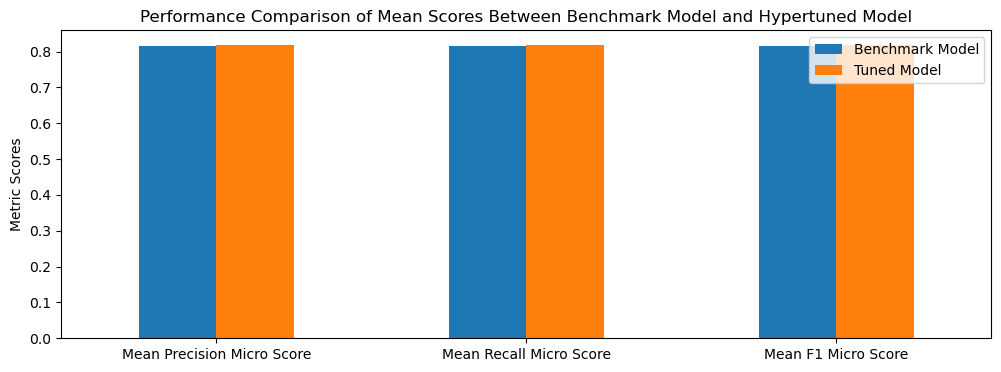

In [121]:
dict = {'Benchmark Model': crossval_metrics_mean_feature_rf, 'Tuned Model':crossval_metrics_mean_hyper}
bench_hyper_metrics = pd.DataFrame(dict)
print('The table below depicts the Mean Precision, Recall and F1 Scores between the Benchmark and Hypertuned Model:')
print(bench_hyper_metrics, end='\n\n')
bench_hyper_metrics.plot(kind='bar', figsize=(12,4))
plt.xticks(rotation='horizontal')
plt.title('Performance Comparison of Mean Scores Between Benchmark Model and Hypertuned Model')
plt.ylabel('Metric Scores')
plt.show()